# Song-Recommendation-ML

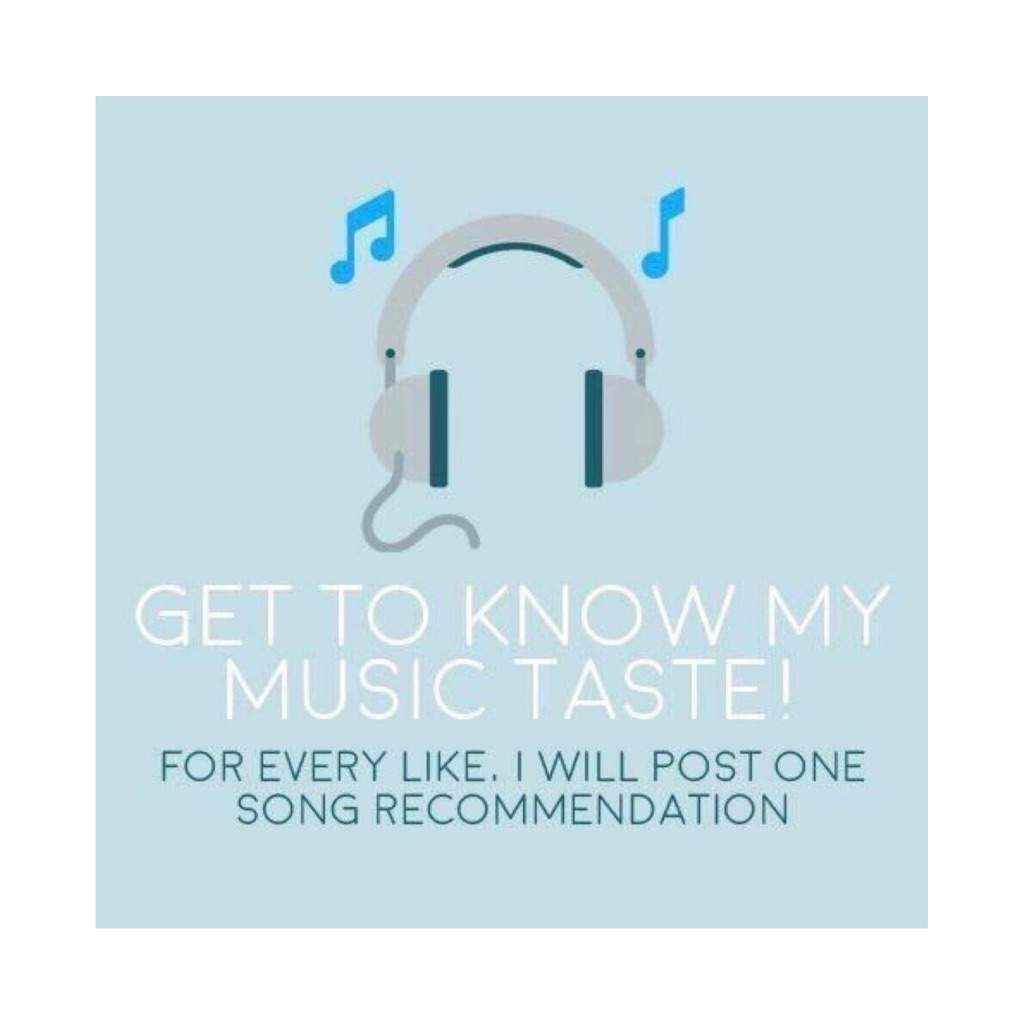

                            ~~~Image has been taken from Google Image.
Recommendation of a song for the listener nased on gender, age, region, artist they like and many more.

Let's connect our jupyter notebook to jovian.

# Problem Statement 

I selected the 15th data set from the resources tab in Jovian.
Link from where I downloaded the dataset: https://www.kaggle.com/c/MusicHackathon/data

This data has ratings given by the listeners, qualitative feedback, answers to the question on music and listeners demographics. We will use this dataset to get the rating of the test dataset.

It is a Regression type problem.

Installing the required libraries for making the model

In [4]:
!pip install plotly==5.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 5.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (14, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import os
import opendatasets as od
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

Downloading data set from Kaggle in the notebook

In [8]:
od.download('https://www.kaggle.com/c/MusicHackathon/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pdheeraj2002
Your Kaggle Key: ··········


100%|██████████| 6.62M/6.62M [00:00<00:00, 49.3MB/s]


Extracting archive ./MusicHackathon/MusicHackathon.zip to ./MusicHackathon


In [9]:
os.listdir('MusicHackathon')

['UserKey.csv',
 'global_mean_benchmark.csv',
 'words.csv',
 'tracks_mean_benchmark.csv',
 'sample.r',
 'artists_mean_benchmark.csv',
 'users_mean_benchmark.csv',
 'test.csv',
 'logo_greenplum_main.png',
 'users.csv',
 'train.csv']

Converting the dataset to dataframe

In [10]:
train_df = pd.read_csv('./MusicHackathon/train.csv')
test_df = pd.read_csv('./MusicHackathon/test.csv')
words_df = pd.read_csv('./MusicHackathon/words.csv', encoding = "ISO-8859-1")
users_df = pd.read_csv('./MusicHackathon/users.csv')

In [11]:
train_df

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19
...,...,...,...,...,...
188685,0,3,1278,29,6
188686,1,6,2839,30,18
188687,10,142,35756,61,12
188688,22,54,20163,46,21


In [12]:
test_df

,Artist,Track,User,Time
0,1,6,3475,18
1,6,149,39210,15
2,40,177,47861,17
3,31,79,27413,11
4,26,66,23232,22
...,...,...,...,...
125789,14,95,30004,23
125790,10,25,8186,7
125791,40,146,38180,13
125792,22,113,32918,0


In [13]:
words_df

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,Laid back,Wholesome,Uplifting,Intriguing,Legendary,Free,Thoughtful,Outspoken,Serious,Good lyrics,Unattractive,Confident,Old,Youthful,Boring,Current,Colourful,Stylish,Cheap,Irrelevant,Heartfelt,Calm,Pioneer,Outgoing,Inspiring,Beautiful,Fun,Authentic,Credible,Way out,Cool,Catchy,Sensitive,Mainstream,Superficial,Annoying,Dark,Passionate,Not authentic,Good Lyrics,Background,Timeless,Depressing,Original,Talented,Worldly,Distinctive,Approachable,Genius,Trendsetter,Noisy,Upbeat,Relatable,Energetic,Exciting,Emotional,Nostalgic,None of these,Progressive,Sexy,Over,Rebellious,Fake,Cheesy,Popular,Superstar,Relaxed,Intrusive,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,0,NaN,0,0,NaN,0,0,0.0,0,NaN,0.0,NaN,0,0.0,0.0,NaN,0,NaN,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,NaN,0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0,1,0,0,NaN,0,1.0,0.0,0.0,0.0,0.0,NaN,0,0.0,NaN,NaN,0,0.0,0,0,NaN,1,0,NaN,0,0.0,0.0,0.0,0,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,NaN,0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,1,0,0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0.0,NaN,NaN,0,0.0,0,1,NaN,0,0,NaN,0,0.0,0.0,0.0,0,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0,NaN,0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0,0,0,0,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,0,NaN,NaN,NaN,0,0.0,0,0,NaN,0,0,NaN,0,0.0,0.0,0.0,0,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,NaN,0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0,0,0,0,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,0,NaN,NaN,NaN,0,0.0,0,0,NaN,0,0,NaN,0,0.0,0.0,0.0,0,NaN,NaN,NaN,1,NaN,0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118296,4,3932,Heard of and listened to music EVER,Own a little of their music,26.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0,NaN,0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0,0,0,0,NaN,0,0.0,0.0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,0,0.0,0,0,NaN,0,0,NaN,0,0.0,0.0,NaN,0,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
118297,4,3935,Heard of and listened to music EVER,Own a little of their music,30.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0,NaN,0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0,0,0,0,NaN,0,0.0,0.0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,0,0.0,1,0,NaN,0,0,NaN,0,0.0,1.0,NaN,0,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
118298,12,11216,Heard of and listened to music RECENTLY,Own none of their music,71.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1,NaN,0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,1,1,0,0,NaN,0,1.0,0.0,0.0,0.0,NaN,NaN,0,NaN,NaN,NaN,0,0.0,0,0,NaN,0,1,NaN,0,0.0,0.0,0.0,0,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0,NaN,NaN
118299,33,35142,Heard of and listened to music EVER,Own none of their music,31.0,NaN,NaN,

In [14]:
users_df

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,49.0,50.0,32.0,33.0,32.0,0.0,74.0,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,62.0,9.0,9.0,9.0,10.0,11.0,55.0,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,9.0,8.0,45.0,10.0,30.0,29.0,8.0,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,88.0,88.0,31.0,31.0,51.0,30.0,8.0,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,78.0,73.0,71.0,68.0,73.0,67.0,31.0,56.0,13.0,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,19361,Male,48.0,Self-employed,Midlands,I like music but it does not feature heavily i...,Less than an hour,2 hours,9.0,73.0,33.0,6.0,10.0,68.0,51.0,52.0,93.0,53.0,74.0,36.0,13.0,38.0,12.0,10.0,50.0,10.0,28.0
48641,17639,Female,60.0,Full-time housewife / househusband,Midlands,Music means a lot to me and is a passion of mine,2 hours,1 hour,26.0,50.0,49.0,58.0,59.0,48.0,6.0,5.0,88.0,58.0,62.0,79.0,17.0,24.0,30.0,6.0,73.0,20.0,21.0
48642,28753,Female,25.0,Employed 30+ hours a week,Midlands,Music means a lot to me and is a passion of mine,2 hours,6 hours,89.0,89.0,89.0,6.0,6.0,51.0,26.0,5.0,0.0,70.0,70.0,70.0,51.0,70.0,70.0,NaN,100.0,70.0,69.0
48643,26197,Male,44.0,Employed 30+ hours a week,Midlands,Music means a lot to me and is a passion of mine,2 hours,4 hours,95.0,97.0,97.0,98.0,97.0,99.0,100.0,99.0,100.0,97.0,98.0,99.0,97.0,99.0,99.0,99.0,100.0,91.0,96.0


In [15]:
words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118301 entries, 0 to 118300
Data columns (total 88 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            118301 non-null  int64  
 1   User              118301 non-null  int64  
 2   HEARD_OF          118277 non-null  object 
 3   OWN_ARTIST_MUSIC  33507 non-null   object 
 4   LIKE_ARTIST       33308 non-null   float64
 5   Uninspired        26154 non-null   float64
 6   Sophisticated     20724 non-null   float64
 7   Aggressive        97577 non-null   float64
 8   Edgy              118301 non-null  int64  
 9   Sociable          20724 non-null   float64
 10  Laid back         20724 non-null   float64
 11  Wholesome         1040 non-null    float64
 12  Uplifting         20724 non-null   float64
 13  Intriguing        20724 non-null   float64
 14  Legendary         1040 non-null    float64
 15  Free              20724 non-null   float64
 16  Thoughtful        11

# Score to words DF

Now i will be giving score to 'words_df' by preprocessing the df.

The score system works like this:

* For each value 1 in the positive columns, we **add 1 point to the total score**
* For each value 1 in the negative columns, we **subtract 1 point to the total score**
* Any 0 and NaN value we **ignore as they are neutral**

In [16]:
positive_score = ['Sophisticated', 'Sociable', 'Laid back', 'Wholesome', 'Uplifting', 'Intriguing', 'Legendary', 'Free', 'Outspoken', 'Good lyrics', 'Confident', 'Youthful', 'Current', 'Colourful', 'Stylish', 'Heartfelt', 'Pioneer', 'Outgoing', 'Inspiring', 'Beautiful', 'Fun', 'Authentic', 'Credible', 'Way out', 'Cool', 'Catchy', 'Sensitive', 'Passionate', 'Good Lyrics', 'Timeless', 'Original', 'Talented', 'Distinctive', 'Approachable', 'Genius', 'Trendsetter', 'Upbeat', 'Relatable', 'Energetic', 'Exciting', 'Emotional', 'Nostalgic', 'Progressive', 'Sexy', 'Over', 'Popular', 'Superstar', 'Relaxed', 'Iconic', 'Classic', 'Playful', 'Warm', 'Soulful']

In [17]:
negative_score = ['Uninspired', 'Unattractive', 'Boring', 'Cheap', 'Irrelevant', 'Superficial', 'Annoying', 'Not authentic', 'Depressing', 'Noisy', 'Fake', 'Cheesy', 'Intrusive', 'Unoriginal', 'Dated', 'Unapproachable']

In [18]:
words_df['plus_score'] = words_df[positive_score].sum(axis=1)
words_df['minus_score'] = words_df[negative_score].sum(axis=1)
words_df['words_score'] = words_df['plus_score'] - words_df['minus_score']

In [19]:
words_df[words_df.LIKE_ARTIST > 90].sample(15)

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,Laid back,Wholesome,Uplifting,Intriguing,Legendary,Free,Thoughtful,Outspoken,Serious,Good lyrics,Unattractive,Confident,Old,Youthful,Boring,Current,Colourful,Stylish,Cheap,Irrelevant,Heartfelt,Calm,Pioneer,Outgoing,Inspiring,Beautiful,Fun,Authentic,Credible,Way out,Cool,Catchy,Sensitive,Mainstream,Superficial,Annoying,Dark,Passionate,Not authentic,Good Lyrics,Background,Timeless,Depressing,Original,Talented,Worldly,Distinctive,Approachable,Genius,Trendsetter,Noisy,Upbeat,Relatable,Energetic,Exciting,Emotional,Nostalgic,None of these,Progressive,Sexy,Over,Rebellious,Fake,Cheesy,Popular,Superstar,Relaxed,Intrusive,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87,plus_score,minus_score,words_score
61341,17,14077,Heard of and listened to music EVER,Own none of their music,97.0,NaN,1.0,NaN,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0,0,NaN,0,0,NaN,1,0,0.0,0,NaN,0.0,NaN,0,1.0,0.0,NaN,0,NaN,1,NaN,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,5.0,0.0,5.0
112317,22,32417,Listened to recently,Own a lot of their music,92.0,NaN,0.0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0.0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,0.0,0.0,0,NaN,0,0,0.0,0,0,1.0,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0,0.0,0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,NaN,1.0,0.0,1.0
63273,8,9197,Heard of and listened to music EVER,Own a little of their music,93.0,NaN,1.0,NaN,1,1.0,0.0,NaN,1.0,0.0,NaN,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,1.0,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,1,1,1,0.0,1,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,1.0,0.0,1,NaN,1,1,NaN,1,1,1.0,0,NaN,0.0,NaN,1,1.0,0.0,NaN,0,NaN,1,NaN,0.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,28.0,0.0,28.0
60559,22,17873,Heard of and listened to music RECENTLY,Own a lot of their music,92.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0,NaN,0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,1,0,0,0,NaN,1,0.0,1.0,0.0,0.0,NaN,NaN,1,NaN,NaN,NaN,1,0.0,0,0,NaN,0,0,NaN,0,0.0,0.0,1.0,0,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN,8.0,0.0,8.0
8108,44,43174,Heard of and listened to music RECENTLY,Own a lot of their music,94.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.0,1.0,0.0,1.0,NaN,0.0,NaN,0,NaN,0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0,0,1,0,NaN,0,1.0,0.0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,0,0.0,0,0,NaN,0,1,NaN,0,0.0,0.0,NaN,0,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN,5.0,0.0,5.0
20171,22,20534,Heard of and listened to music RECENTLY,Own a lot of their music,92.0,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1.0,1.0,0.0,1.0,NaN,0.0,0.0,1,NaN,1,0.0,NaN,NaN,0.0,NaN,1.0,1.0,1,0,1,0,NaN,1,0.0,1.0,0.0,0.0,NaN,NaN,1,NaN,NaN,NaN,1,0.0,1,1,NaN,1,0,NaN,1,0.0,0.0,1.0,1,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0,NaN,NaN,20.0,0.0,20.0
54272,40,36860,Heard of and listened to music RECENTLY,Own a lot of their music,99.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,NaN,0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0,0,0,0,NaN,0,1.0,0.0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,0,0.0,0,0,NaN,0,0,NaN,0,0.0,0.0,NaN,1,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN,3.0,0.0,3.0
4944,44,41784,Heard of and listened to music RECENTLY,Own all or most of their music,93.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,NaN,0,NaN,0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1,0,1,0,NaN,0,0.0,0.0,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,0,0.0,1,0,NaN,1,0,NaN,0,0.0,0.0,NaN,0,NaN,NaN,NaN,0,NaN,0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0,NaN,NaN,8.0,0.0,8.0
36830,3,3016,Heard of and listened to music EVER,Own a lot of

As now we gave the word score we don't need the words columns in the words_df dataframe.
Now we will create a dateframe where the columns will be the **word score of above 90**

In [20]:
words_red_df = words_df[['Artist', 'User', 'HEARD_OF', 'OWN_ARTIST_MUSIC', 'LIKE_ARTIST', 'words_score']]

In [21]:
words_red_df

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score
0,47,45969,Heard of,NaN,NaN,-1.0
1,35,29118,Never heard of,NaN,NaN,3.0
2,14,31544,Heard of,NaN,NaN,2.0
3,23,18085,Never heard of,NaN,NaN,-1.0
4,23,18084,Never heard of,NaN,NaN,0.0
...,...,...,...,...,...,...
118296,4,3932,Heard of and listened to music EVER,Own a little of their music,26.0,-1.0
118297,4,3935,Heard of and listened to music EVER,Own a little of their music,30.0,1.0
118298,12,11216,Heard of and listened to music RECENTLY,Own none of their music,71.0,6.0
118299,33,35142,Heard of and listened to music EVER,Own none of their music,31.0,3.0


In [22]:
words_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118301 entries, 0 to 118300
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            118301 non-null  int64  
 1   User              118301 non-null  int64  
 2   HEARD_OF          118277 non-null  object 
 3   OWN_ARTIST_MUSIC  33507 non-null   object 
 4   LIKE_ARTIST       33308 non-null   float64
 5   words_score       118301 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.4+ MB


# Merging

Now we will merge words_red_df & users_df into training_merge_df dataframe

In [23]:
users_df.rename(columns={'RESPID': 'User'}, inplace=True)

In [24]:
training_merge_df = train_df.merge(words_red_df, how='left', on=['Artist', 'User'])

In [25]:
users_df

,User,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,49.0,50.0,32.0,33.0,32.0,0.0,74.0,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,62.0,9.0,9.0,9.0,10.0,11.0,55.0,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,9.0,8.0,45.0,10.0,30.0,29.0,8.0,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,88.0,88.0,31.0,31.0,51.0,30.0,8.0,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,78.0,73.0,71.0,68.0,73.0,67.0,31.0,56.0,13.0,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,19361,Male,48.0,Self-employed,Midlands,I like music but it does not feature heavily i...,Less than an hour,2 hours,9.0,73.0,33.0,6.0,10.0,68.0,51.0,52.0,93.0,53.0,74.0,36.0,13.0,38.0,12.0,10.0,50.0,10.0,28.0
48641,17639,Female,60.0,Full-time housewife / househusband,Midlands,Music means a lot to me and is a passion of mine,2 hours,1 hour,26.0,50.0,49.0,58.0,59.0,48.0,6.0,5.0,88.0,58.0,62.0,79.0,17.0,24.0,30.0,6.0,73.0,20.0,21.0
48642,28753,Female,25.0,Employed 30+ hours a week,Midlands,Music means a lot to me and is a passion of mine,2 hours,6 hours,89.0,89.0,89.0,6.0,6.0,51.0,26.0,5.0,0.0,70.0,70.0,70.0,51.0,70.0,70.0,NaN,100.0,70.0,69.0
48643,26197,Male,44.0,Employed 30+ hours a week,Midlands,Music means a lot to me and is a passion of mine,2 hours,4 hours,95.0,97.0,97.0,98.0,97.0,99.0,100.0,99.0,100.0,97.0,98.0,99.0,97.0,99.0,99.0,99.0,100.0,91.0,96.0


In [26]:
training_merge_df

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score
0,40,179,47994,9,17,Never heard of,NaN,NaN,-2.0
1,9,23,8575,58,7,Never heard of,NaN,NaN,5.0
2,46,168,45475,13,16,Never heard of,NaN,NaN,1.0
3,11,153,39508,42,15,Heard of and listened to music EVER,Own none of their music,28.0,4.0
4,14,32,11565,54,19,Heard of and listened to music EVER,Own none of their music,18.0,2.0
...,...,...,...,...,...,...,...,...,...
188685,0,3,1278,29,6,Never heard of,NaN,NaN,3.0
188686,1,6,2839,30,18,Heard of,NaN,NaN,-1.0
188687,10,142,35756,61,12,Heard of,NaN,NaN,3.0
188688,22,54,20163,46,21,Heard of and listened to music RECENTLY,Own a lot of their music,74.0,10.0


In [27]:
training_merge_df = training_merge_df.merge(users_df, how='left', on=['User'])

In [28]:
training_merge_df

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,40,179,47994,9,17,Never heard of,NaN,NaN,-2.0,Female,41.0,Temporarily unemployed,North,Music means a lot to me and is a passion of mine,3 hours,0 Hours,62.0,22.0,62.0,48.0,35.0,30.0,48.0,28.0,88.0,70.0,49.0,49.0,32.0,32.0,50.0,31.0,31.0,10.0,9.0
1,9,23,8575,58,7,Never heard of,NaN,NaN,5.0,Female,45.0,NaN,Centre,Music is important to me but not necessarily m...,1,2,32.0,57.0,52.0,10.0,10.0,29.0,73.0,51.0,12.0,50.0,91.0,72.0,32.0,55.0,53.0,54.0,75.0,NaN,NaN
2,46,168,45475,13,16,Never heard of,NaN,NaN,1.0,Male,23.0,Employed 8-29 hours per week,Midlands,Music means a lot to me and is a passion of mine,5 hours,NaN,100.0,75.0,90.0,48.0,25.0,34.0,46.0,29.0,29.0,71.0,72.0,48.0,100.0,100.0,28.0,65.0,72.0,73.0,83.0
3,11,153,39508,42,15,Heard of and listened to music EVER,Own none of their music,28.0,4.0,Female,61.0,Retired from self-employment,Midlands,Music is important to me but not necessarily m...,1 hour,NaN,62.0,57.0,55.0,44.0,53.0,66.0,33.0,27.0,41.0,52.0,71.0,73.0,53.0,61.0,49.0,52.0,63.0,50.0,45.0
4,14,32,11565,54,19,Heard of and listened to music EVER,Own none of their music,18.0,2.0,Female,20.0,Temporarily unemployed,South,Music is important to me but not necessarily m...,Less than an hour,3 hours,22.0,69.0,28.0,52.0,32.0,22.0,9.0,10.0,11.0,55.0,84.0,70.0,20.0,19.0,11.0,47.0,71.0,37.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188685,0,3,1278,29,6,Never heard of,NaN,NaN,3.0,Female,53.0,NaN,North,Music is important to me but not necessarily m...,1,NaN,68.0,52.0,66.0,49.0,49.0,31.0,30.0,8.0,29.0,49.0,74.0,69.0,50.0,30.0,11.0,51.0,51.0,NaN,NaN
188686,1,6,2839,30,18,Heard of,NaN,NaN,-1.0,Male,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,1 hour,75.0,50.0,32.0,7.0,48.0,50.0,66.0,30.0,48.0,48.0,48.0,30.0,30.0,49.0,32.0,32.0,47.0,31.0,8.0
188687,10,142,35756,61,12,Heard of,NaN,NaN,3.0,Female,28.0,Full-time housewife / househusband,North,Music is important to me but not necessarily m...,NaN,NaN,52.0,67.0,51.0,52.0,53.0,35.0,15.0,14.0,53.0,51.0,50.0,51.0,57.0,51.0,52.0,52.0,52.0,54.0,47.0
188688,22,54,20163,46,21,Heard of and listened to music RECENTLY,Own a lot of their music,74.0,10.0,Female,35.0,Employed 30+ hours a week,North,Music is important to me but not necessarily m...,1 hour,1 hour,9.0,27.0,13.0,13.0,6.0,58.0,45.0,30.0,61.0,13.0,54.0,49.0,65.0,50.0,4.0,46.0,77.0,47.0,39.0


In [29]:
training_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188690 entries, 0 to 188689
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            188690 non-null  int64  
 1   Track             188690 non-null  int64  
 2   User              188690 non-null  int64  
 3   Rating            188690 non-null  int64  
 4   Time              188690 non-null  int64  
 5   HEARD_OF          186418 non-null  object 
 6   OWN_ARTIST_MUSIC  56835 non-null   object 
 7   LIKE_ARTIST       55028 non-null   float64
 8   words_score       186636 non-null  float64
 9   GENDER            176833 non-null  object 
 10  AGE               174982 non-null  float64
 11  WORKING           140545 non-null  object 
 12  REGION            167481 non-null  object 
 13  MUSIC             176833 non-null  object 
 14  LIST_OWN          158651 non-null  object 
 15  LIST_BACK         158790 non-null  object 
 16  Q1                17

In [30]:
training_merge_df.sample(15)

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
157823,37,101,28680,10,23,Heard of and listened to music EVER,Own none of their music,57.0,-8.0,Male,39.0,Employed 30+ hours a week,South,Music is important to me but not necessarily m...,2 hours,1 hour,41.0,70.0,70.0,20.0,44.0,27.0,47.0,45.0,63.0,96.0,43.0,45.0,71.0,70.0,72.0,NaN,75.0,74.0,75.0
51032,27,71,21320,9,22,Never heard of,NaN,NaN,-1.0,Male,20.0,Part-time student,North,Music means a lot to me and is a passion of mine,13 hours,2 hours,53.0,69.0,72.0,41.0,51.0,6.0,51.0,50.0,83.0,98.0,51.0,15.0,90.0,51.0,84.0,NaN,56.0,86.0,82.0
57817,42,158,42805,11,16,Heard of,NaN,NaN,-2.0,Female,24.0,Full-time housewife / househusband,South,I like music but it does not feature heavily i...,4 hours,12 hours,36.0,33.0,33.0,65.0,86.0,46.0,35.0,17.0,87.0,52.0,48.0,71.0,20.0,27.0,38.0,40.0,69.0,44.0,51.0
153619,1,4,3026,32,18,Heard of,NaN,NaN,-4.0,Male,52.0,Employed 30+ hours a week,South,Music means a lot to me and is a passion of mine,4 hours,1 hour,68.0,68.0,65.0,12.0,11.0,10.0,48.0,30.0,10.0,88.0,71.0,68.0,69.0,69.0,69.0,53.0,69.0,68.0,68.0
126819,1,5,2859,6,18,Never heard of,NaN,NaN,-5.0,Male,64.0,Retired from self-employment,South,I like music but it does not feature heavily i...,Less than an hour,2 hours,94.0,94.0,94.0,94.0,93.0,98.0,96.0,96.0,96.0,96.0,65.0,95.0,33.0,34.0,94.0,93.0,94.0,94.0,96.0
156686,22,55,18557,70,21,Heard of,NaN,NaN,3.0,Male,62.0,Other,North,Music has no particular interest for me,0 Hours,0 Hours,13.0,29.0,26.0,43.0,42.0,31.0,29.0,11.0,67.0,41.0,41.0,40.0,30.0,7.0,7.0,9.0,25.0,21.0,9.0
179944,6,148,39101,32,15,NaN,NaN,NaN,NaN,Male,38.0,Employed 30+ hours a week,Midlands,Music is important to me but not necessarily m...,1 hour,1 hour,51.0,52.0,51.0,50.0,49.0,49.0,50.0,51.0,49.0,49.0,47.0,48.0,48.0,47.0,47.0,46.0,51.0,52.0,52.0
31382,6,14,6061,37,7,Heard of and listened to music EVER,Own none of their music,33.0,5.0,Male,23.0,NaN,South,Music means a lot to me and is a passion of mine,2,1,40.0,55.0,75.0,87.0,56.0,70.0,62.0,79.0,62.0,78.0,62.0,53.0,57.0,51.0,70.0,53.0,83.0,NaN,NaN
179943,26,64,22977,51,22,Never heard of,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10229,1,6,2450,8,18,Heard of,NaN,NaN,1.0,Female,47.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,Less than an hour,2 hours,11.0,28.0,7.0,10.0,10.0,51.0,8.0,11.0,73.0,53.0,54.0,27.0,27.0,52.0,11.0,10.0,9.0,13.0,10.0


Merging the test dataset

In [31]:
test_merge_df = test_df.merge(words_red_df, how='left', on=['Artist', 'User'])
test_merge_df = test_merge_df.merge(users_df, how='left', on=['User'])

In [32]:
test_merge_df

,Artist,Track,User,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,1,6,3475,18,Heard of and listened to music EVER,Own none of their music,3.0,2.0,Female,48.0,Employed 30+ hours a week,South,Music means a lot to me and is a passion of mine,1 hour,3 hours,8.0,69.0,27.0,27.0,50.0,27.0,26.0,8.0,51.0,50.0,66.0,49.0,20.0,7.0,8.0,9.0,7.0,4.0,8.0
1,6,149,39210,15,NaN,NaN,NaN,NaN,Male,28.0,Employed 30+ hours a week,Midlands,Music is important to me but not necessarily m...,1 hour,1 hour,81.0,67.0,94.0,61.0,53.0,32.0,41.0,42.0,36.0,76.0,70.0,76.0,58.0,61.0,66.0,51.0,75.0,70.0,72.0
2,40,177,47861,17,Never heard of,NaN,NaN,-2.0,Female,59.0,Other,Midlands,Music is no longer as important as it used to ...,Less than an hour,Less than an hour,9.0,94.0,49.0,48.0,49.0,8.0,13.0,56.0,92.0,92.0,55.0,57.0,11.0,57.0,10.0,11.0,91.0,7.0,9.0
3,31,79,27413,11,Never heard of,NaN,NaN,0.0,Female,25.0,Employed part-time less than 8 hours per week,Midlands,I like music but it does not feature heavily i...,1 hour,1 hour,53.0,38.0,51.0,53.0,53.0,53.0,33.0,51.0,47.0,33.0,41.0,45.0,49.0,49.0,49.0,49.0,35.0,52.0,52.0
4,26,66,23232,22,Never heard of,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125789,14,95,30004,23,Heard of,NaN,NaN,12.0,Male,36.0,Employed 30+ hours a week,Midlands,Music means a lot to me and is a passion of mine,10 hours,4 hours,84.0,69.0,100.0,32.0,9.0,28.0,9.0,12.0,50.0,75.0,68.0,72.0,64.0,70.0,75.0,NaN,72.0,56.0,54.0
125790,10,25,8186,7,Never heard of,NaN,NaN,6.0,Male,49.0,NaN,North,I like music but it does not feature heavily i...,NaN,3,29.0,70.0,30.0,30.0,69.0,14.0,12.0,12.0,70.0,29.0,50.0,48.0,54.0,66.0,10.0,34.0,70.0,NaN,NaN
125791,40,146,38180,13,Heard of,NaN,NaN,3.0,Female,40.0,Full-time housewife / househusband,Midlands,Music means a lot to me and is a passion of mine,15 hours,9 hours,59.0,51.0,51.0,83.0,32.0,43.0,14.0,41.0,71.0,58.0,36.0,43.0,81.0,63.0,45.0,65.0,30.0,46.0,21.0
125792,22,113,32918,0,Ever heard music by,Own none of their music,48.0,2.0,Female,48.0,NaN,NaN,Music means a lot to me and is a passion of mine,0,1,69.0,30.0,76.0,74.0,73.0,11.0,11.0,11.0,92.0,34.0,74.0,72.0,36.0,37.0,9.0,9.0,64.0,NaN,NaN


# Data Analysis 

Now we will try to get the insights from the dataset and see if there is any relationship between the columns. We must also check if any of the columns are interdependent. We ask Question and then we visualize the dataset to get the Answer.

We can do this by plotting the graphs for various columns and observing the relation between the two or more columns depending on the plot we choose.

In [33]:
# Do you love or hate the the song?
px.histogram(training_merge_df, x='Rating', nbins=101, marginal='box', title='Rating(Love/Hate) Distribution')

In [34]:
training_merge_df.columns

Index(['Artist', 'Track', 'User', 'Rating', 'Time', 'HEARD_OF',
       'OWN_ARTIST_MUSIC', 'LIKE_ARTIST', 'words_score', 'GENDER', 'AGE',
       'WORKING', 'REGION', 'MUSIC', 'LIST_OWN', 'LIST_BACK', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
       'Q15', 'Q16', 'Q17', 'Q18', 'Q19'],
      dtype='object')

In [36]:
plot_order= training_merge_df.groupby('Time')['Rating'].mean().sort_values(ascending=False).index.values

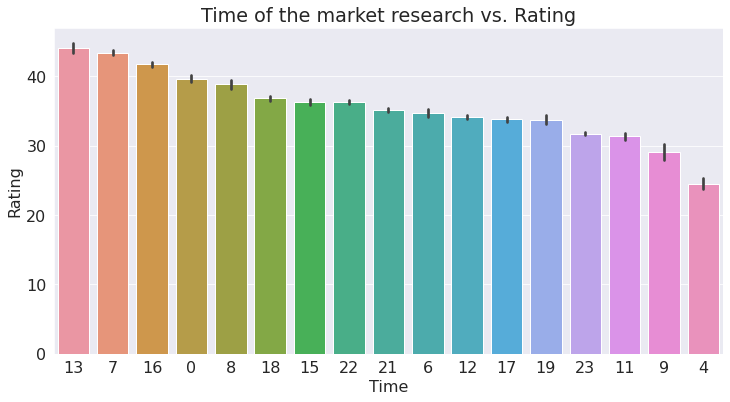

In [37]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Time of the market research vs. Rating')
sns.barplot(x='Time', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=0, ha='center')
plt.show();

In [38]:
plot_order= training_merge_df.groupby('Artist')['Rating'].mean().sort_values(ascending=False).index.values

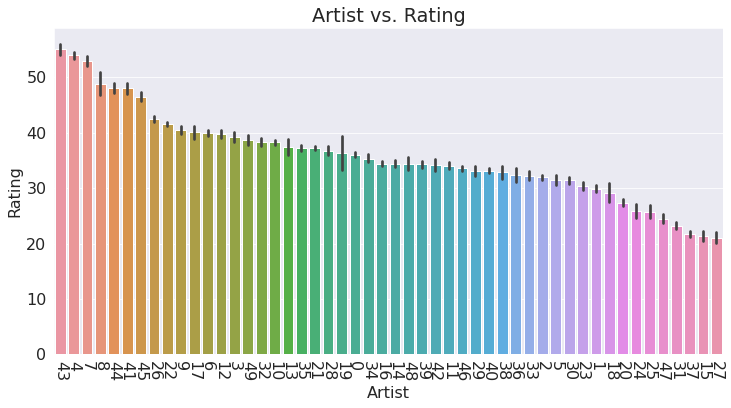

In [39]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Artist vs. Rating')
sns.barplot(x='Artist', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=270, ha='center')
plt.show();

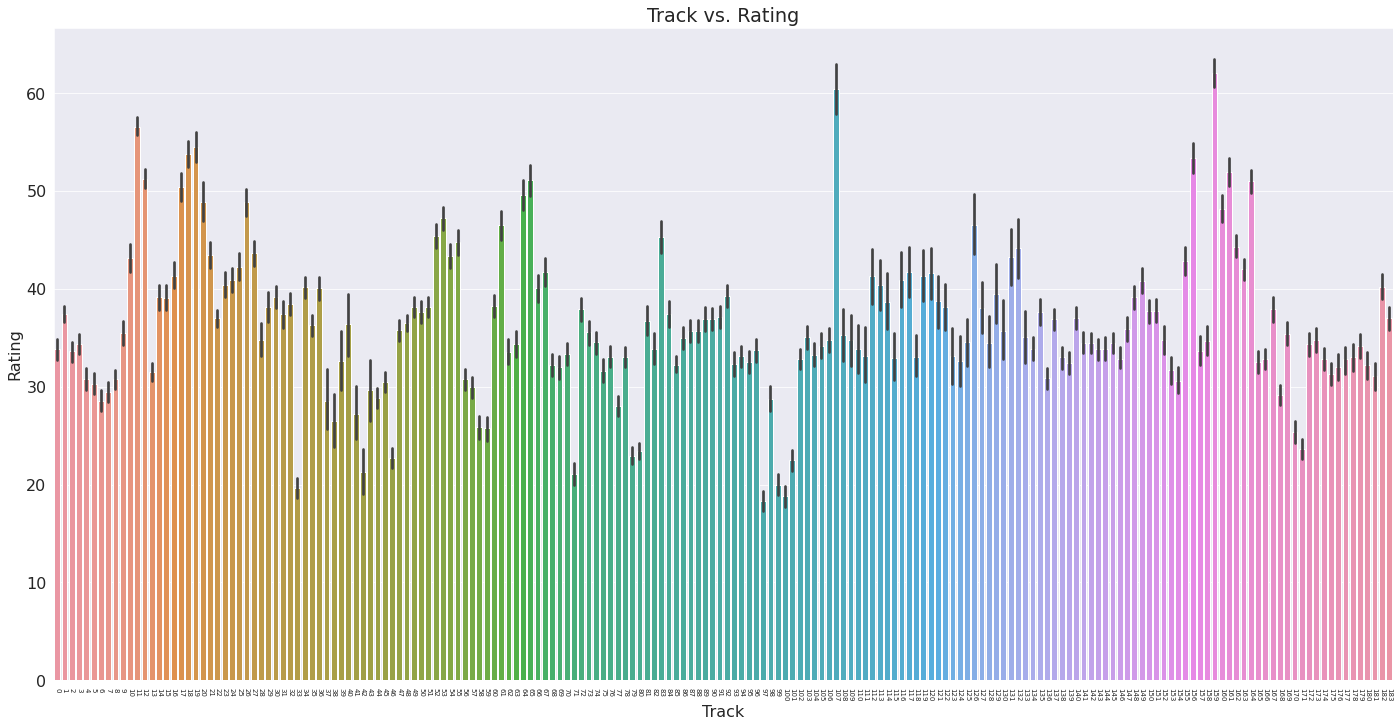

In [40]:
fig, ax = plt.subplots(figsize=(24,12))

plt.title('Track vs. Rating')
sns.barplot(x='Track', y='Rating', data=training_merge_df)
plt.xticks(rotation=-90, fontsize=7, ha='center')
plt.show();

# Change of columns

In [41]:
training_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188690 entries, 0 to 188689
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            188690 non-null  int64  
 1   Track             188690 non-null  int64  
 2   User              188690 non-null  int64  
 3   Rating            188690 non-null  int64  
 4   Time              188690 non-null  int64  
 5   HEARD_OF          186418 non-null  object 
 6   OWN_ARTIST_MUSIC  56835 non-null   object 
 7   LIKE_ARTIST       55028 non-null   float64
 8   words_score       186636 non-null  float64
 9   GENDER            176833 non-null  object 
 10  AGE               174982 non-null  float64
 11  WORKING           140545 non-null  object 
 12  REGION            167481 non-null  object 
 13  MUSIC             176833 non-null  object 
 14  LIST_OWN          158651 non-null  object 
 15  LIST_BACK         158790 non-null  object 
 16  Q1                17

In [42]:
training_merge_df['HEARD_OF'].value_counts()

Never heard of                             94090
Heard of                                   35493
Heard of and listened to music EVER        29854
Heard of and listened to music RECENTLY    17847
Ever heard music by                         5136
Listened to recently                        2191
Ever heard of                               1807
Name: HEARD_OF, dtype: int64

In [43]:
print('Missing values in HEARD_OF column {}'.format(training_merge_df['HEARD_OF'].isna().sum()))

Missing values in HEARD_OF column 2272


In [44]:
training_merge_df['HEARD_OF'].replace(['Ever heard of'], 'Never heard of', inplace=True)
training_merge_df['HEARD_OF'].replace(['Ever heard music by'], 'Heard of and listened to music EVER', inplace=True)
training_merge_df['HEARD_OF'].replace(['Listened to recently'], 'Heard of and listened to music RECENTLY', inplace=True)
training_merge_df['HEARD_OF'].fillna('Never heard of', inplace=True)

In [45]:
training_merge_df['HEARD_OF'].unique()

array(['Never heard of', 'Heard of and listened to music EVER',
       'Heard of', 'Heard of and listened to music RECENTLY'],
      dtype=object)

In [46]:
test_merge_df['HEARD_OF'].replace(['Ever heard of'], 'Never heard of', inplace=True)
test_merge_df['HEARD_OF'].replace(['Ever heard music by'], 'Heard of and listened to music EVER', inplace=True)
test_merge_df['HEARD_OF'].replace(['Listened to recently'], 'Heard of and listened to music RECENTLY', inplace=True)
test_merge_df['HEARD_OF'].fillna('Never heard of', inplace=True)

In [47]:
test_merge_df['HEARD_OF'].unique()

array(['Heard of and listened to music EVER', 'Never heard of',
       'Heard of', 'Heard of and listened to music RECENTLY'],
      dtype=object)

In [48]:
training_merge_df['HEARD_OF'].value_counts()

Never heard of                             98169
Heard of                                   35493
Heard of and listened to music EVER        34990
Heard of and listened to music RECENTLY    20038
Name: HEARD_OF, dtype: int64

In [49]:
plot_order= training_merge_df.groupby('HEARD_OF')['Rating'].mean().sort_values(ascending=False).index.values

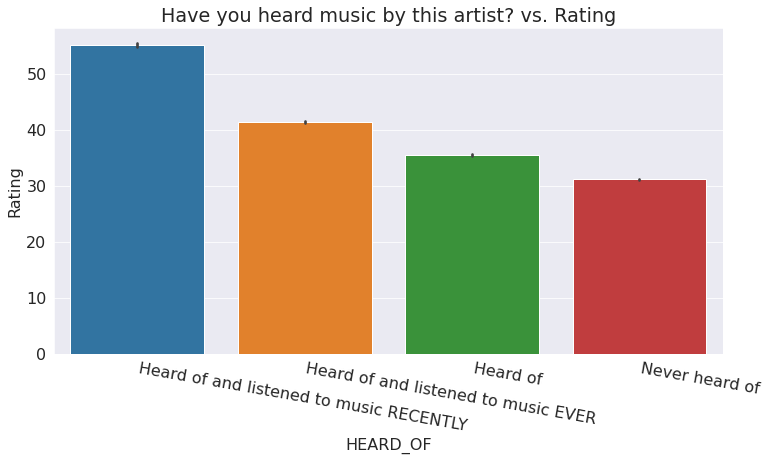

In [50]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Have you heard music by this artist? vs. Rating')
sns.barplot(x='HEARD_OF', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# Own_Artist_Music

In [51]:
training_merge_df['OWN_ARTIST_MUSIC'].unique()

array([nan, 'Own none of their music', 'Own a little of their music',
       'Own all or most of their music', 'DonÕt know',
       'Own a lot of their music', 'DonÍt know', 'don`t know'],
      dtype=object)

In [52]:
training_merge_df['OWN_ARTIST_MUSIC'].value_counts()

Own none of their music           26810
Own a little of their music       18721
Own a lot of their music           7263
Own all or most of their music     2593
DonÕt know                         1265
DonÍt know                          147
don`t know                           36
Name: OWN_ARTIST_MUSIC, dtype: int64

In [53]:
training_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÕt know'], 'Own none of their music', inplace=True)
training_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÍt know'], 'Own none of their music', inplace=True)
training_merge_df['OWN_ARTIST_MUSIC'].replace(['don`t know'], 'Own none of their music', inplace=True)
training_merge_df['OWN_ARTIST_MUSIC'].fillna('Own none of their music', inplace=True)

In [54]:
test_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÕt know'], 'Own none of their music', inplace=True)
test_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÍt know'], 'Own none of their music', inplace=True)
test_merge_df['OWN_ARTIST_MUSIC'].replace(['don`t know'], 'Own none of their music', inplace=True)
test_merge_df['OWN_ARTIST_MUSIC'].fillna('Own none of their music', inplace=True)

In [55]:
training_merge_df['OWN_ARTIST_MUSIC'].unique()

array(['Own none of their music', 'Own a little of their music',
       'Own all or most of their music', 'Own a lot of their music'],
      dtype=object)

In [56]:
training_merge_df['OWN_ARTIST_MUSIC'].value_counts()

Own none of their music           160113
Own a little of their music        18721
Own a lot of their music            7263
Own all or most of their music      2593
Name: OWN_ARTIST_MUSIC, dtype: int64

In [57]:
plot_order= training_merge_df.groupby('OWN_ARTIST_MUSIC')['Rating'].mean().sort_values(ascending=False).index.values

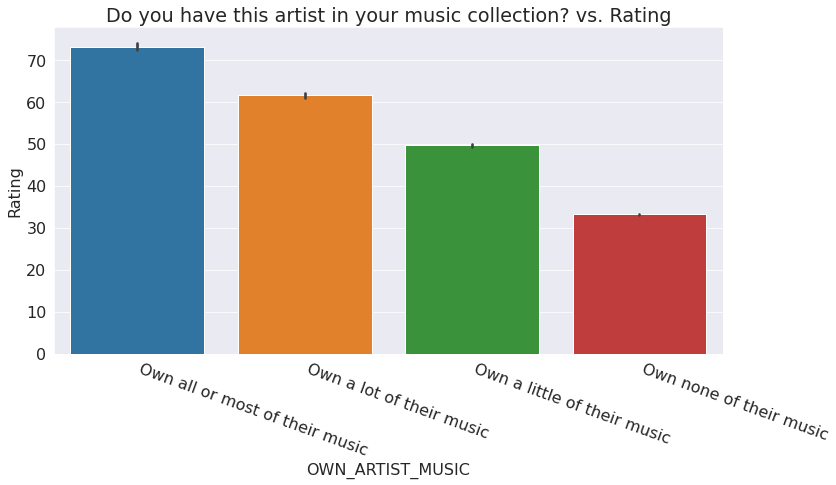

In [58]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Do you have this artist in your music collection? vs. Rating')
sns.barplot(x='OWN_ARTIST_MUSIC', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=340, ha='left')
plt.show();

# LIKE_ARTIST

In [59]:
training_merge_df['LIKE_ARTIST'].unique()

array([   nan,  28.  ,  18.  ,  33.  ,  36.  ,  53.  ,  50.  ,  63.  ,
        68.  ,  56.  ,  74.  ,  51.  ,  38.  ,  29.  ,  71.  ,  90.  ,
        70.  ,  30.  ,  52.  ,  84.  ,  59.  ,  66.  ,  42.  ,  48.  ,
        32.  ,  49.  ,  81.  , 100.  ,  45.  ,  87.  ,  57.  ,  83.  ,
        92.  ,  75.  ,  47.  ,  13.  ,  41.  ,  17.  ,  12.  ,   1.  ,
         4.  ,  55.  ,  65.  ,  16.  ,  58.  ,  99.  ,  69.  ,  15.  ,
        27.  ,  46.  ,  10.  ,  44.  ,  35.  ,   6.  ,  31.  ,  73.  ,
        26.  ,   2.  ,  43.  ,  54.  ,  61.  ,   9.  ,  14.  ,  62.  ,
        67.  ,  89.  ,  72.  ,  39.  ,   7.  ,   5.  ,  31.34,  20.  ,
        88.  ,  25.  ,  94.  ,  77.  ,  82.  ,  64.  ,  80.  ,  22.  ,
        23.  ,  86.  ,  40.  ,  37.  ,  34.  ,  21.  ,  93.  ,  11.  ,
        91.  ,  30.92,  98.  ,  79.  ,   8.  ,  33.05,   3.  ,  76.  ,
        85.  ,  78.  ,  60.  ,  24.  ,  97.  ,  19.  ,  95.  ,  29.21,
        28.14,  96.  ,  62.47,  48.83,  54.58,  23.24,  39.45,   0.  ,
      

In [60]:
training_merge_df['LIKE_ARTIST'].value_counts()

49.00    2707
51.00    2463
30.00    2425
50.00    2218
29.00    2114
         ... 
44.99       1
57.57       1
60.55       1
98.08       1
80.38       1
Name: LIKE_ARTIST, Length: 168, dtype: int64

In [61]:
training_merge_df

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,40,179,47994,9,17,Never heard of,Own none of their music,NaN,-2.0,Female,41.0,Temporarily unemployed,North,Music means a lot to me and is a passion of mine,3 hours,0 Hours,62.0,22.0,62.0,48.0,35.0,30.0,48.0,28.0,88.0,70.0,49.0,49.0,32.0,32.0,50.0,31.0,31.0,10.0,9.0
1,9,23,8575,58,7,Never heard of,Own none of their music,NaN,5.0,Female,45.0,NaN,Centre,Music is important to me but not necessarily m...,1,2,32.0,57.0,52.0,10.0,10.0,29.0,73.0,51.0,12.0,50.0,91.0,72.0,32.0,55.0,53.0,54.0,75.0,NaN,NaN
2,46,168,45475,13,16,Never heard of,Own none of their music,NaN,1.0,Male,23.0,Employed 8-29 hours per week,Midlands,Music means a lot to me and is a passion of mine,5 hours,NaN,100.0,75.0,90.0,48.0,25.0,34.0,46.0,29.0,29.0,71.0,72.0,48.0,100.0,100.0,28.0,65.0,72.0,73.0,83.0
3,11,153,39508,42,15,Heard of and listened to music EVER,Own none of their music,28.0,4.0,Female,61.0,Retired from self-employment,Midlands,Music is important to me but not necessarily m...,1 hour,NaN,62.0,57.0,55.0,44.0,53.0,66.0,33.0,27.0,41.0,52.0,71.0,73.0,53.0,61.0,49.0,52.0,63.0,50.0,45.0
4,14,32,11565,54,19,Heard of and listened to music EVER,Own none of their music,18.0,2.0,Female,20.0,Temporarily unemployed,South,Music is important to me but not necessarily m...,Less than an hour,3 hours,22.0,69.0,28.0,52.0,32.0,22.0,9.0,10.0,11.0,55.0,84.0,70.0,20.0,19.0,11.0,47.0,71.0,37.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188685,0,3,1278,29,6,Never heard of,Own none of their music,NaN,3.0,Female,53.0,NaN,North,Music is important to me but not necessarily m...,1,NaN,68.0,52.0,66.0,49.0,49.0,31.0,30.0,8.0,29.0,49.0,74.0,69.0,50.0,30.0,11.0,51.0,51.0,NaN,NaN
188686,1,6,2839,30,18,Heard of,Own none of their music,NaN,-1.0,Male,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,1 hour,75.0,50.0,32.0,7.0,48.0,50.0,66.0,30.0,48.0,48.0,48.0,30.0,30.0,49.0,32.0,32.0,47.0,31.0,8.0
188687,10,142,35756,61,12,Heard of,Own none of their music,NaN,3.0,Female,28.0,Full-time housewife / househusband,North,Music is important to me but not necessarily m...,NaN,NaN,52.0,67.0,51.0,52.0,53.0,35.0,15.0,14.0,53.0,51.0,50.0,51.0,57.0,51.0,52.0,52.0,52.0,54.0,47.0
188688,22,54,20163,46,21,Heard of and listened to music RECENTLY,Own a lot of their music,74.0,10.0,Female,35.0,Employed 30+ hours a week,North,Music is important to me but not necessarily m...,1 hour,1 hour,9.0,27.0,13.0,13.0,6.0,58.0,45.0,30.0,61.0,13.0,54.0,49.0,65.0,50.0,4.0,46.0,77.0,47.0,39.0


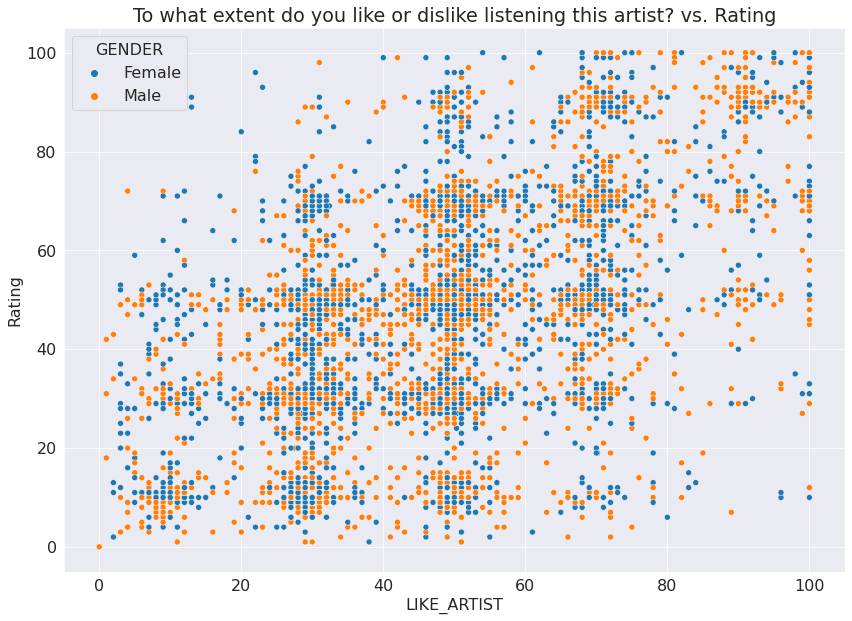

In [62]:
plt.title('To what extent do you like or dislike listening this artist? vs. Rating')
sns.scatterplot(x='LIKE_ARTIST', y='Rating', hue='GENDER', data=training_merge_df.sample(15000));

In [63]:
training_merge_df[training_merge_df['LIKE_ARTIST'].isna()].Rating.describe()

count    133662.000000
mean         32.326353
std          20.782582
min           0.000000
25%          12.000000
50%          30.000000
75%          48.000000
max         100.000000
Name: Rating, dtype: float64

In [64]:
training_merge_df.Rating.describe()

count    188690.000000
mean         36.435391
std          22.586036
min           0.000000
25%          15.000000
50%          32.000000
75%          50.000000
max         100.000000
Name: Rating, dtype: float64

In [65]:
training_merge_df[~training_merge_df['LIKE_ARTIST'].isna()].Rating.describe()

count    55028.000000
mean        46.416170
std         23.653523
min          0.000000
25%         30.000000
50%         48.000000
75%         64.250000
max        100.000000
Name: Rating, dtype: float64

# Words_Score

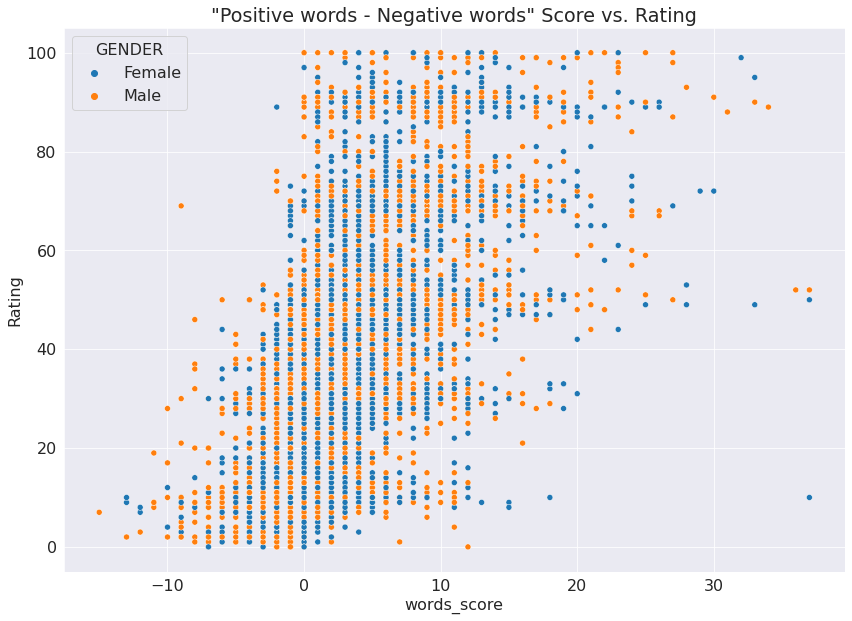

In [66]:
plt.title('"Positive words - Negative words" Score vs. Rating')
sns.scatterplot(x='words_score', y='Rating', hue='GENDER', data=training_merge_df.sample(10000));

# GENDER

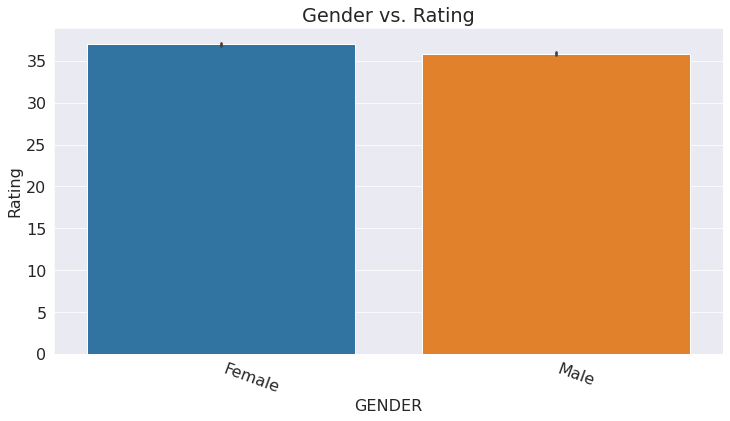

In [67]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Gender vs. Rating')
sns.barplot(x='GENDER', y='Rating', data=training_merge_df)
plt.xticks(rotation=340, ha='left')
plt.show();

# AGE

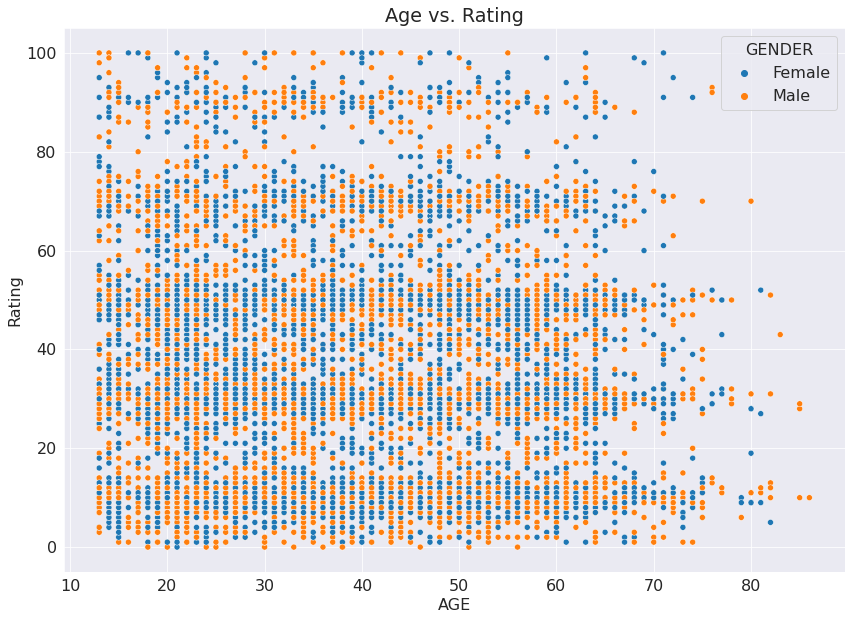

In [68]:
plt.title('Age vs. Rating')
sns.scatterplot(x='AGE', y='Rating', hue='GENDER', data=training_merge_df.sample(10000));

In [69]:
training_merge_df['AGE'].describe()

count    174982.000000
mean         39.246923
std          16.035515
min          13.000000
25%          25.000000
50%          39.000000
75%          52.000000
max          94.000000
Name: AGE, dtype: float64

In [70]:
print('Nan cells in the training_merge_df table {}'.format(training_merge_df['AGE'].isna().sum()))

Nan cells in the training_merge_df table 13708


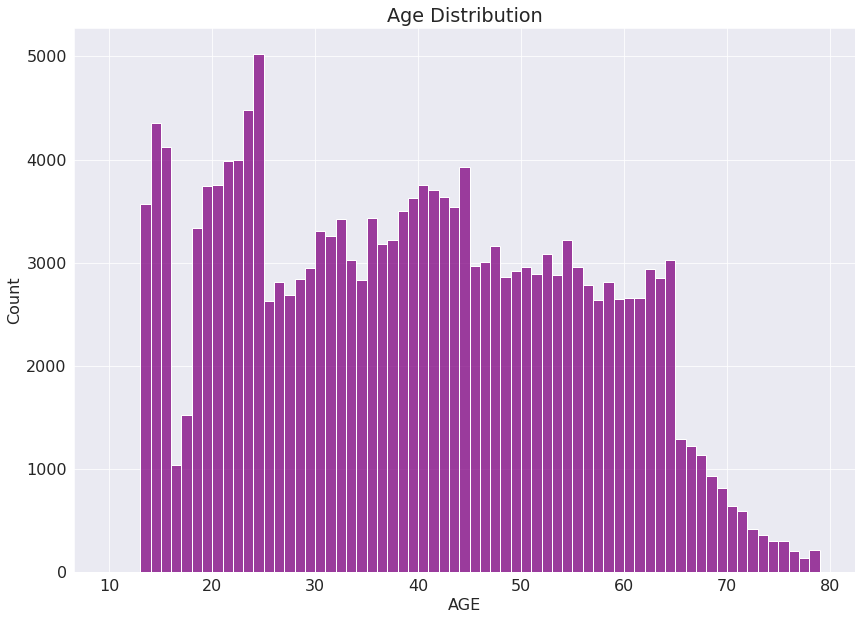

In [71]:
plt.title('Age Distribution')
sns.histplot(training_merge_df.AGE, bins=np.arange(10,80,1), color='purple');

In [72]:
training_merge_df[training_merge_df['AGE'] > 50].AGE.count()

48897

In [73]:
def age_to_categorical(x):
  try:
    if int(x) <= 17:
      return '13-17'
    elif 17< int(x) <= 25:
      return '18-25'
    elif 25< int(x) <= 35:
      return '26-35'
    elif 35< int(x) <= 50:
      return '36-50'
    elif 50< int(x) <= 65:
      return '51-65'
    else:
      return 'older than 65'
  except:
    return np.nan

In [74]:
training_merge_df['AGE_GROUP'] = training_merge_df['AGE'].apply(lambda x: age_to_categorical(x))

In [75]:
training_merge_df['AGE_GROUP'].value_counts()

36-50            49963
51-65            41315
18-25            30944
26-35            30573
13-17            14605
older than 65     7582
Name: AGE_GROUP, dtype: int64

In [76]:
training_merge_df['AGE_GROUP'].fillna('36-50', inplace=True)
training_merge_df['AGE'].fillna(39, inplace=True)

Test DataFrame

In [77]:
test_merge_df['AGE_GROUP'] = test_merge_df['AGE'].apply(lambda x: age_to_categorical(x))
test_merge_df['AGE_GROUP'].fillna('36-50', inplace=True)
test_merge_df['AGE'].fillna(39, inplace=True)

In [78]:
plot_order= training_merge_df.groupby('AGE_GROUP')['Rating'].mean().sort_values(ascending=False).index.values

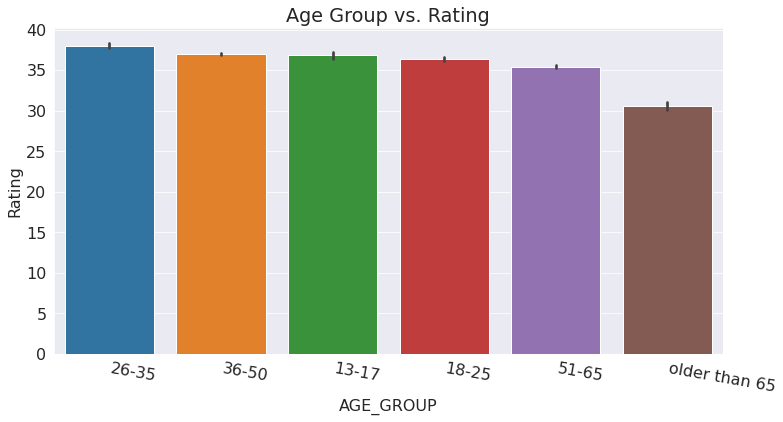

In [79]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Age Group vs. Rating')
sns.barplot(x='AGE_GROUP', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# Working

In [80]:
training_merge_df['WORKING'].value_counts()

Employed 30+ hours a week                                 53347
Full-time student                                         20244
Employed 8-29 hours per week                              16284
Retired from full-time employment (30+ hours per week)    13234
Full-time housewife / househusband                        10367
Self-employed                                              7629
Temporarily unemployed                                     7528
Other                                                      5725
Retired from self-employment                               1480
Employed part-time less than 8 hours per week              1480
In unpaid employment (e.g. voluntary work)                 1407
Prefer not to state                                         947
Part-time student                                           873
Name: WORKING, dtype: int64

In [81]:
plot_order= training_merge_df.groupby('WORKING')['Rating'].mean().sort_values(ascending=False).index.values

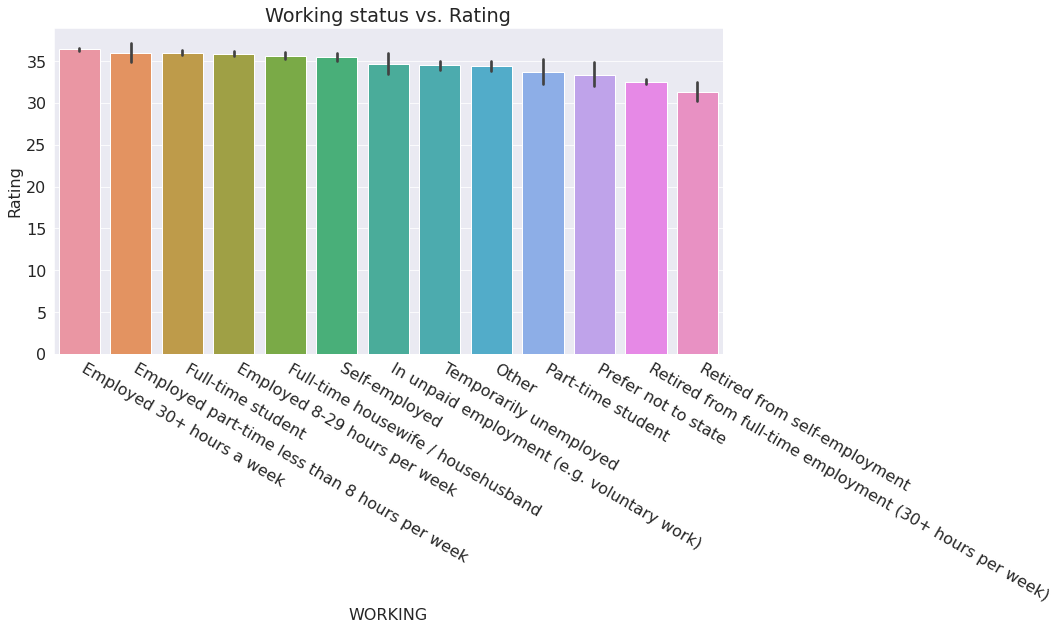

In [82]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Working status vs. Rating')
sns.barplot(x='WORKING', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=330, ha='left')
plt.show();

# Region

In [83]:
training_merge_df['REGION'].unique()

array(['North', 'Centre', 'Midlands', 'South', nan, 'Northern Ireland',
       'North Ireland'], dtype=object)

In [84]:
training_merge_df['REGION'].value_counts()

North               58707
South               54005
Midlands            44220
Centre               7284
Northern Ireland     2890
North Ireland         375
Name: REGION, dtype: int64

In [85]:
training_merge_df['REGION'].replace(['North Ireland'], 'Northern Ireland', inplace=True)
test_merge_df['REGION'].replace(['North Ireland'], 'Northern Ireland', inplace=True)

In [86]:
plot_order= training_merge_df.groupby('REGION')['Rating'].mean().sort_values(ascending=False).index.values

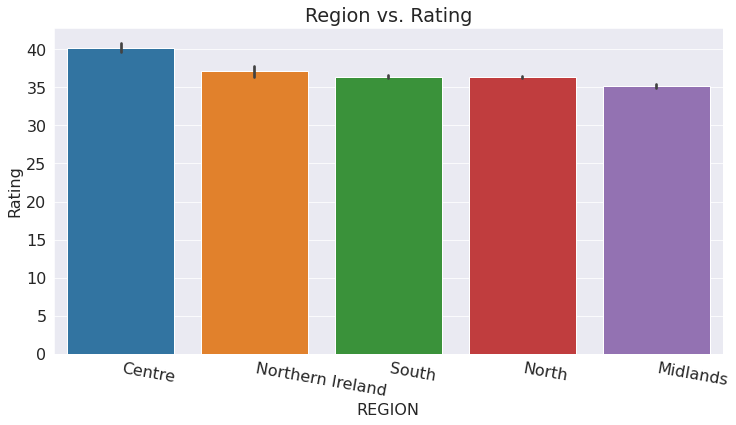

In [87]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Region vs. Rating')
sns.barplot(x='REGION', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# Music

In [88]:
training_merge_df['MUSIC'].unique()

array(['Music means a lot to me and is a passion of mine',
       'Music is important to me but not necessarily more important',
       'I like music but it does not feature heavily in my life',
       'Music is important to me but not necessarily more important than other hobbies or interests',
       nan, 'Music has no particular interest for me',
       'Music is no longer as important as it used to be to me'],
      dtype=object)

In [89]:
training_merge_df['MUSIC'].value_counts()

Music is important to me but not necessarily more important                                    56695
Music means a lot to me and is a passion of mine                                               54793
I like music but it does not feature heavily in my life                                        43023
Music is important to me but not necessarily more important than other hobbies or interests    12977
Music is no longer as important as it used to be to me                                          5702
Music has no particular interest for me                                                         3643
Name: MUSIC, dtype: int64

In [90]:
training_merge_df['MUSIC'].replace(['Music is important to me but not necessarily more important'], 'Music is important to me but not necessarily more important than other hobbies or interests', inplace=True)
test_merge_df['MUSIC'].replace(['Music is important to me but not necessarily more important'], 'Music is important to me but not necessarily more important than other hobbies or interests', inplace=True)

In [91]:
training_merge_df['MUSIC'].value_counts()

Music is important to me but not necessarily more important than other hobbies or interests    69672
Music means a lot to me and is a passion of mine                                               54793
I like music but it does not feature heavily in my life                                        43023
Music is no longer as important as it used to be to me                                          5702
Music has no particular interest for me                                                         3643
Name: MUSIC, dtype: int64

In [92]:
plot_order= training_merge_df.groupby('MUSIC')['Rating'].mean().sort_values(ascending=False).index.values

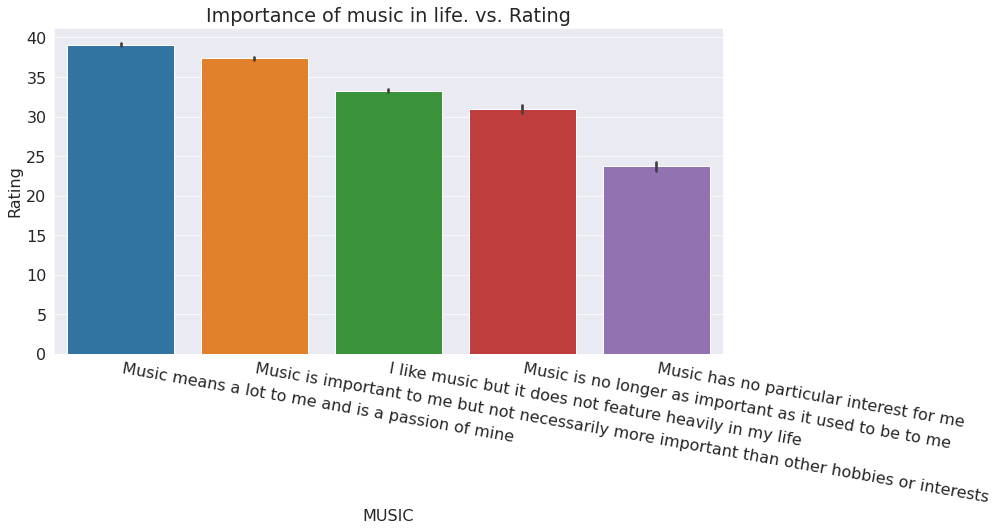

In [93]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Importance of music in life. vs. Rating')
sns.barplot(x='MUSIC', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# List own

In [94]:
training_merge_df['LIST_OWN'].unique()

array(['3 hours', '1', '5 hours', '1 hour', 'Less than an hour',
       '0 Hours', nan, '2', '2 hours', '4 hours', '10 hours', '16+ hours',
       '0', '6 hours', '8 hours', '4', '3', '14 hours', '15 hours',
       '7 hours', '13 hours', '12 hours', '5', '6', '8', '10', '12',
       '9 hours', '7', '11 hours', '16 hours', '15', 'More than 16 hours',
       '20', '16', '9', '17', '14', '11', '18', '22', '24', '13'],
      dtype=object)

In [95]:
training_merge_df['LIST_OWN'].value_counts()

1 hour                29683
2 hours               27505
Less than an hour     26697
3 hours               13078
0 Hours               12367
1                      8801
4 hours                8116
2                      6937
5 hours                4430
3                      2959
0                      2792
6 hours                2744
16+ hours              1978
8 hours                1874
10 hours               1807
4                      1465
7 hours                1164
5                       940
12 hours                774
9 hours                 471
6                       361
11 hours                235
8                       234
15 hours                231
10                      217
14 hours                193
16 hours                130
7                       121
13 hours                106
12                       94
9                        40
15                       22
14                       20
16                       17
20                       13
More than 16 hours  

In [96]:
training_merge_df['LIST_OWN'].isna().sum()

30039

In [97]:
training_merge_df['LIST_OWN'].replace(['0 Hours'], '0', inplace=True)
training_merge_df['LIST_OWN'].replace(['Less than an hour'], '0.5', inplace=True)
training_merge_df['LIST_OWN'].replace(['1 hour'], '1', inplace=True)
training_merge_df['LIST_OWN'].replace(['2 hours'], '2', inplace=True)
training_merge_df['LIST_OWN'].replace(['3 hours'], '3', inplace=True)
training_merge_df['LIST_OWN'].replace(['4 hours'], '4', inplace=True)
training_merge_df['LIST_OWN'].replace(['5 hours'], '5', inplace=True)
training_merge_df['LIST_OWN'].replace(['6 hours'], '6', inplace=True)
training_merge_df['LIST_OWN'].replace(['7 hours'], '7', inplace=True)
training_merge_df['LIST_OWN'].replace(['8 hours'], '8', inplace=True)
training_merge_df['LIST_OWN'].replace(['9 hours'], '9', inplace=True)
training_merge_df['LIST_OWN'].replace(['10 hours'], '10', inplace=True)
training_merge_df['LIST_OWN'].replace(['11 hours'], '11', inplace=True)
training_merge_df['LIST_OWN'].replace(['12 hours'], '12', inplace=True)
training_merge_df['LIST_OWN'].replace(['13 hours'], '13', inplace=True)
training_merge_df['LIST_OWN'].replace(['14 hours'], '14', inplace=True)
training_merge_df['LIST_OWN'].replace(['15 hours'], '15', inplace=True)
training_merge_df['LIST_OWN'].replace(['16 hours'], '16', inplace=True)
training_merge_df['LIST_OWN'].replace(['16+ hours'], '16', inplace=True)
training_merge_df['LIST_OWN'].replace(['More than 16 hours'], '16', inplace=True)

In [98]:
training_merge_df['LIST_OWN'].fillna('No Answer', inplace=True)

Test DataFrame

In [99]:
test_merge_df['LIST_OWN'].replace(['0 Hours'], '0', inplace=True)
test_merge_df['LIST_OWN'].replace(['Less than an hour'], '0.5', inplace=True)
test_merge_df['LIST_OWN'].replace(['1 hour'], '1', inplace=True)
test_merge_df['LIST_OWN'].replace(['2 hours'], '2', inplace=True)
test_merge_df['LIST_OWN'].replace(['3 hours'], '3', inplace=True)
test_merge_df['LIST_OWN'].replace(['4 hours'], '4', inplace=True)
test_merge_df['LIST_OWN'].replace(['5 hours'], '5', inplace=True)
test_merge_df['LIST_OWN'].replace(['6 hours'], '6', inplace=True)
test_merge_df['LIST_OWN'].replace(['7 hours'], '7', inplace=True)
test_merge_df['LIST_OWN'].replace(['8 hours'], '8', inplace=True)
test_merge_df['LIST_OWN'].replace(['9 hours'], '9', inplace=True)
test_merge_df['LIST_OWN'].replace(['10 hours'], '10', inplace=True)
test_merge_df['LIST_OWN'].replace(['11 hours'], '11', inplace=True)
test_merge_df['LIST_OWN'].replace(['12 hours'], '12', inplace=True)
test_merge_df['LIST_OWN'].replace(['13 hours'], '13', inplace=True)
test_merge_df['LIST_OWN'].replace(['14 hours'], '14', inplace=True)
test_merge_df['LIST_OWN'].replace(['15 hours'], '15', inplace=True)
test_merge_df['LIST_OWN'].replace(['16 hours'], '16', inplace=True)
test_merge_df['LIST_OWN'].replace(['16+ hours'], '16', inplace=True)
test_merge_df['LIST_OWN'].replace(['More than 16 hours'], '16', inplace=True)
test_merge_df['LIST_OWN'].fillna('No Answer', inplace=True)

In [100]:
plot_order= training_merge_df.groupby('LIST_OWN')['Rating'].mean().sort_values(ascending=False).index.values

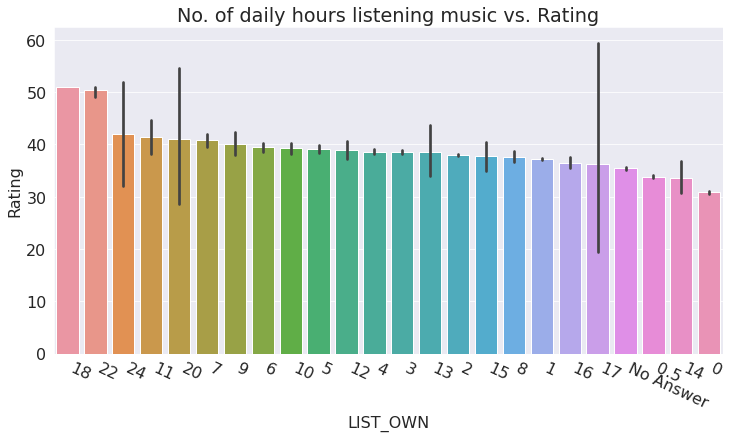

In [101]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('No. of daily hours listening music vs. Rating')
sns.barplot(x='LIST_OWN', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=335, ha='left')
plt.show();

In [102]:
lo_mapper = {'No Answer': 'No Answer', 
          '0': '0', 
          '0.5': '0.5',
          '1': '1',
          '2': '2',
          '3': '3-6',
          '4': '3-6',
          '5': '3-6',
          '6': '3-6',
          '7': '7-10',
          '8': '7-10',
          '9': '7-10',
          '10': '7-10',
          '11': '11-14',
          '12':  '11-14',
          '13': '11-14',
          '14': '11-14',
          '15': '15-19',
          '16': '15-19',
          '17': '15-19',
          '18': '15-19',
          '19': '15-19',
          '20': '20 and plus',
          '21': '20 and plus',
          '22': '20 and plus',
          '23': '20 and plus',
          '24': '20 and plus'
          }

In [103]:
training_merge_df['LIST_OWN'] = training_merge_df['LIST_OWN'].map(lo_mapper)

In [104]:
training_merge_df['LIST_OWN'].unique()

array(['3-6', '1', '0.5', '0', 'No Answer', '2', '7-10', '15-19', '11-14',
       '20 and plus'], dtype=object)

In [105]:
training_merge_df['LIST_OWN'].value_counts()

1              38484
2              34442
3-6            34093
No Answer      30039
0.5            26697
0              15159
7-10            5928
15-19           2399
11-14           1431
20 and plus       18
Name: LIST_OWN, dtype: int64

In [106]:
plot_order= training_merge_df.groupby('LIST_OWN')['Rating'].mean().sort_values(ascending=False).index.values

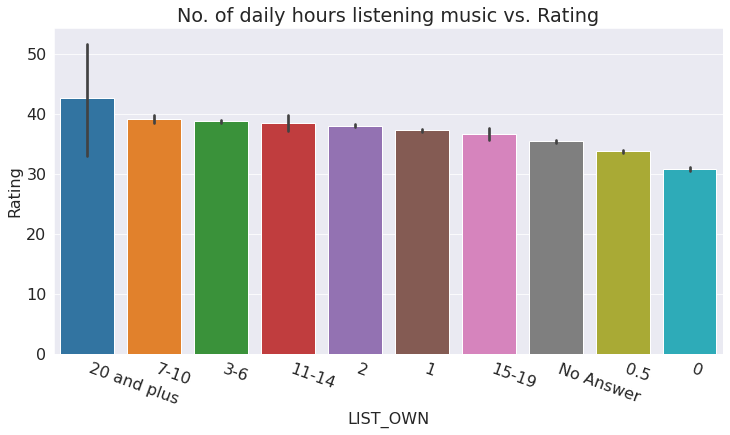

In [107]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('No. of daily hours listening music vs. Rating')
sns.barplot(x='LIST_OWN', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=340, ha='left')
plt.show();

In [108]:
test_merge_df['LIST_OWN'] = test_merge_df['LIST_OWN'].map(lo_mapper)

# List Back

In [109]:
training_merge_df['LIST_BACK'].unique()

array(['0 Hours', '2', nan, '3 hours', 'Less than an hour', '4 hours',
       '8 hours', '5 hours', '4', '3', '1 hour', '2 hours', '5', '1',
       '6 hours', '7 hours', 'More than 16 hours', '0', '9 hours', '6',
       '14 hours', '16+ hours', '8', '10 hours', '9', '16 hours',
       '15 hours', '12', '12 hours', '10', '20', '18', '11 hours',
       '13 hours', '7', '14', '15', '19', '24', '16', '11', '21'],
      dtype=object)

In [110]:
training_merge_df['LIST_BACK'].value_counts()

2 hours               24663
1 hour                23409
Less than an hour     22232
3 hours               13679
0 Hours               10565
4 hours               10492
1                      6856
5 hours                6170
2                      6027
6 hours                5099
8 hours                4473
3                      3097
16+ hours              2890
0                      2768
7 hours                2572
10 hours               2544
4                      2284
5                      1587
9 hours                1200
12 hours               1171
6                      1119
8                      1013
7                       498
14 hours                369
11 hours                334
15 hours                325
10                      319
16 hours                278
12                      213
13 hours                213
9                       189
20                       36
More than 16 hours       23
15                       17
14                       14
19                  

In [111]:
training_merge_df['LIST_BACK'].replace(['0 Hours'], '0', inplace=True)
training_merge_df['LIST_BACK'].replace(['Less than an hour'], '0.5', inplace=True)
training_merge_df['LIST_BACK'].replace(['1 hour'], '1', inplace=True)
training_merge_df['LIST_BACK'].replace(['2 hours'], '2', inplace=True)
training_merge_df['LIST_BACK'].replace(['3 hours'], '3', inplace=True)
training_merge_df['LIST_BACK'].replace(['4 hours'], '4', inplace=True)
training_merge_df['LIST_BACK'].replace(['5 hours'], '5', inplace=True)
training_merge_df['LIST_BACK'].replace(['6 hours'], '6', inplace=True)
training_merge_df['LIST_BACK'].replace(['7 hours'], '7', inplace=True)
training_merge_df['LIST_BACK'].replace(['8 hours'], '8', inplace=True)
training_merge_df['LIST_BACK'].replace(['9 hours'], '9', inplace=True)
training_merge_df['LIST_BACK'].replace(['10 hours'], '10', inplace=True)
training_merge_df['LIST_BACK'].replace(['11 hours'], '11', inplace=True)
training_merge_df['LIST_BACK'].replace(['12 hours'], '12', inplace=True)
training_merge_df['LIST_BACK'].replace(['13 hours'], '13', inplace=True)
training_merge_df['LIST_BACK'].replace(['14 hours'], '14', inplace=True)
training_merge_df['LIST_BACK'].replace(['15 hours'], '15', inplace=True)
training_merge_df['LIST_BACK'].replace(['16 hours'], '16', inplace=True)
training_merge_df['LIST_BACK'].replace(['16+ hours'], '16', inplace=True)
training_merge_df['LIST_BACK'].replace(['More than 16 hours'], '16', inplace=True)

In [112]:
training_merge_df['LIST_BACK'].fillna('No Answer', inplace=True)

In [113]:
training_merge_df['LIST_BACK'] = training_merge_df['LIST_BACK'].map(lo_mapper)

In [114]:
plot_order= training_merge_df.groupby('LIST_BACK')['Rating'].mean().sort_values(ascending=False).index.values

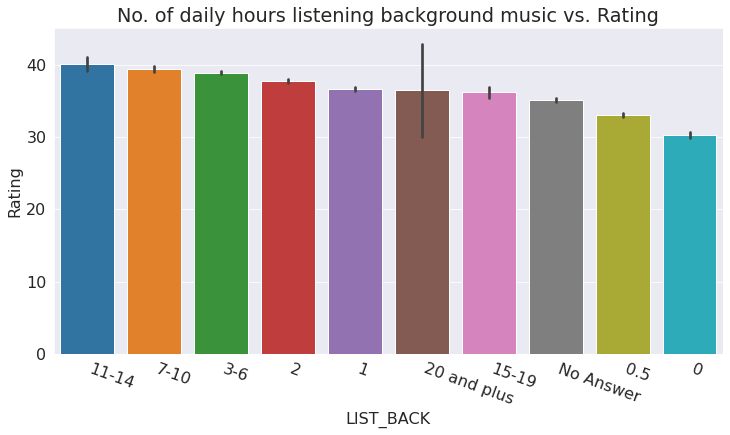

In [115]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('No. of daily hours listening background music vs. Rating')
sns.barplot(x='LIST_BACK', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=340, ha='left')
plt.show();

# Test DataFrame

In [116]:
test_merge_df['LIST_BACK'].replace(['0 Hours'], '0', inplace=True)
test_merge_df['LIST_BACK'].replace(['Less than an hour'], '0.5', inplace=True)
test_merge_df['LIST_BACK'].replace(['1 hour'], '1', inplace=True)
test_merge_df['LIST_BACK'].replace(['2 hours'], '2', inplace=True)
test_merge_df['LIST_BACK'].replace(['3 hours'], '3', inplace=True)
test_merge_df['LIST_BACK'].replace(['4 hours'], '4', inplace=True)
test_merge_df['LIST_BACK'].replace(['5 hours'], '5', inplace=True)
test_merge_df['LIST_BACK'].replace(['6 hours'], '6', inplace=True)
test_merge_df['LIST_BACK'].replace(['7 hours'], '7', inplace=True)
test_merge_df['LIST_BACK'].replace(['8 hours'], '8', inplace=True)
test_merge_df['LIST_BACK'].replace(['9 hours'], '9', inplace=True)
test_merge_df['LIST_BACK'].replace(['10 hours'], '10', inplace=True)
test_merge_df['LIST_BACK'].replace(['11 hours'], '11', inplace=True)
test_merge_df['LIST_BACK'].replace(['12 hours'], '12', inplace=True)
test_merge_df['LIST_BACK'].replace(['13 hours'], '13', inplace=True)
test_merge_df['LIST_BACK'].replace(['14 hours'], '14', inplace=True)
test_merge_df['LIST_BACK'].replace(['15 hours'], '15', inplace=True)
test_merge_df['LIST_BACK'].replace(['16 hours'], '16', inplace=True)
test_merge_df['LIST_BACK'].replace(['16+ hours'], '16', inplace=True)
test_merge_df['LIST_BACK'].replace(['More than 16 hours'], '16', inplace=True)
test_merge_df['LIST_BACK'].fillna('No Answer', inplace=True)

test_merge_df['LIST_BACK'] = test_merge_df['LIST_BACK'].map(lo_mapper)

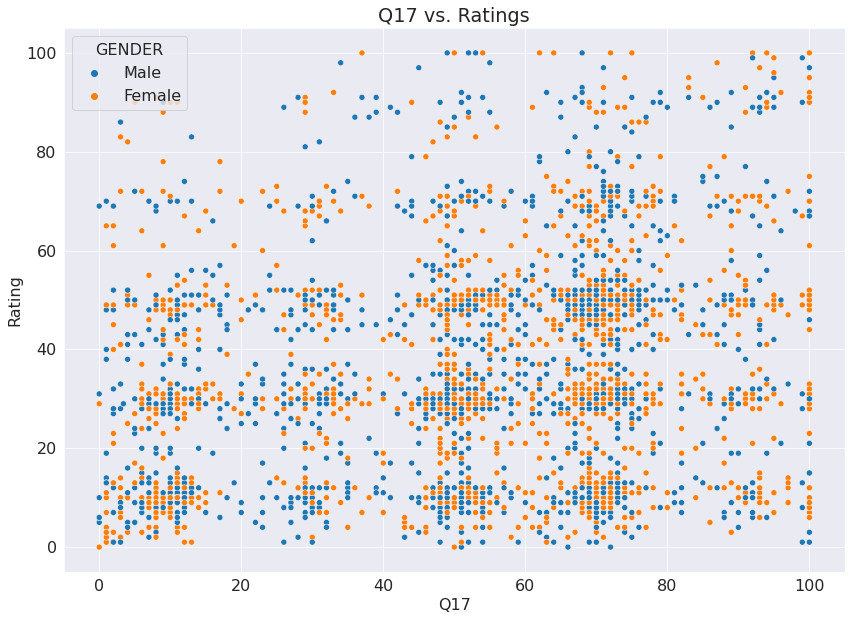

In [117]:
plt.title('Q17 vs. Ratings')
sns.scatterplot(x='Q17', y='Rating', hue='GENDER', data=training_merge_df.sample(3000));

In [118]:
training_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188690 entries, 0 to 188689
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            188690 non-null  int64  
 1   Track             188690 non-null  int64  
 2   User              188690 non-null  int64  
 3   Rating            188690 non-null  int64  
 4   Time              188690 non-null  int64  
 5   HEARD_OF          188690 non-null  object 
 6   OWN_ARTIST_MUSIC  188690 non-null  object 
 7   LIKE_ARTIST       55028 non-null   float64
 8   words_score       186636 non-null  float64
 9   GENDER            176833 non-null  object 
 10  AGE               188690 non-null  float64
 11  WORKING           140545 non-null  object 
 12  REGION            167481 non-null  object 
 13  MUSIC             176833 non-null  object 
 14  LIST_OWN          188690 non-null  object 
 15  LIST_BACK         188690 non-null  object 
 16  Q1                17

# HEARD_OF 

In [119]:
mapper = {'Heard of and listened to music RECENTLY': 4, 
          'Heard of and listened to music EVER': 3,
          'Heard of': 2,
          'Never heard of': 1}

In [120]:
training_merge_df['HEARD_OF'] = training_merge_df['HEARD_OF'].map(mapper)


Test DataFrame

In [121]:
test_merge_df['HEARD_OF'] = test_merge_df['HEARD_OF'].map(mapper)

In [122]:
training_merge_df['HEARD_OF'].unique()

array([1, 3, 2, 4])

In [123]:
training_merge_df['HEARD_OF'].value_counts()

1    98169
2    35493
3    34990
4    20038
Name: HEARD_OF, dtype: int64

# Own Art Music

In [124]:
oam_mapper = {'Own all or most of their music': 4, 
          'Own a lot of their music': 3, 
          'Own a little of their music': 2,
          'Own none of their music': 1}

In [125]:
training_merge_df['OWN_ARTIST_MUSIC'] = training_merge_df['OWN_ARTIST_MUSIC'].map(oam_mapper)

Test DataFrame

In [126]:
test_merge_df['OWN_ARTIST_MUSIC'] = test_merge_df['OWN_ARTIST_MUSIC'].map(oam_mapper)

In [127]:
training_merge_df['OWN_ARTIST_MUSIC'].unique()

array([1, 2, 4, 3])

In [128]:
training_merge_df['OWN_ARTIST_MUSIC'].value_counts()

1    160113
2     18721
3      7263
4      2593
Name: OWN_ARTIST_MUSIC, dtype: int64

# Like Artist

In [129]:
training_merge_df['LIKE_ARTIST'].isna().sum()

133662

In [130]:
def to_categorical(x):
  try:
    if 1<= int(x) <= 10:
      return '1-10'
    elif 11<= int(x) <= 20:
      return '11-20'
    elif 21<= int(x) <= 30:
      return '21-30'
    elif 31<= int(x) <= 40:
      return '31-40'
    elif 41<= int(x) <= 50:
      return '41-50'
    elif 51<= int(x) <= 60:
      return '51-60'
    elif 61<= int(x) <= 70:
      return '61-70'
    elif 71<= int(x) <= 80:
      return '71-80'
    elif 81<= int(x) <= 90:
      return '81-90'
    else:
      return '91-100'
  except:
    return np.nan

In [131]:
training_merge_df['LIKE_ARTIST'] = training_merge_df['LIKE_ARTIST'].apply(lambda x: to_categorical(x))

test_merge_df['LIKE_ARTIST'] = test_merge_df['LIKE_ARTIST'].apply(lambda x: to_categorical(x))

In [132]:
training_merge_df['LIKE_ARTIST'].fillna('No Answer', inplace=True)

test_merge_df['LIKE_ARTIST'].fillna('No Answer', inplace=True)

In [133]:
training_merge_df['LIKE_ARTIST'].value_counts()

No Answer    133662
41-50         11114
21-30          8804
51-60          8244
31-40          6574
61-70          6415
71-80          4976
1-10           2825
91-100         2269
11-20          2126
81-90          1681
Name: LIKE_ARTIST, dtype: int64

# Music

In [134]:
training_merge_df['MUSIC'].unique()

array(['Music means a lot to me and is a passion of mine',
       'Music is important to me but not necessarily more important than other hobbies or interests',
       'I like music but it does not feature heavily in my life', nan,
       'Music has no particular interest for me',
       'Music is no longer as important as it used to be to me'],
      dtype=object)

In [135]:
training_merge_df['MUSIC'].value_counts()

Music is important to me but not necessarily more important than other hobbies or interests    69672
Music means a lot to me and is a passion of mine                                               54793
I like music but it does not feature heavily in my life                                        43023
Music is no longer as important as it used to be to me                                          5702
Music has no particular interest for me                                                         3643
Name: MUSIC, dtype: int64

In [136]:
m_mapper = {'Music means a lot to me and is a passion of mine': 6, 
          'Music is important to me but not necessarily more important than other hobbies or interests': 5, 
          'No Answer': 4,
          'I like music but it does not feature heavily in my life': 3,
          'Music is no longer as important as it used to be to me': 2,
          'Music has no particular interest for me': 1,
          }

In [137]:
training_merge_df['MUSIC'] = training_merge_df['MUSIC'].map(m_mapper)

Test DataFrame

In [138]:
test_merge_df['MUSIC'] = test_merge_df['MUSIC'].map(m_mapper)

#Missing Values in DF

In [139]:
training_merge_df['GENDER'].fillna('No Answer', inplace=True)
training_merge_df['WORKING'].fillna('No Answer', inplace=True)
training_merge_df['REGION'].fillna('No Answer', inplace=True)

test_merge_df['GENDER'].fillna('No Answer', inplace=True)
test_merge_df['WORKING'].fillna('No Answer', inplace=True)
test_merge_df['REGION'].fillna('No Answer', inplace=True)

#Training & Validation Sets

### As test set is already given.
We put 20% of Training test into calidation set.

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
training_df, validation_df = train_test_split(training_merge_df, test_size=0.2)

In [142]:
print('training_df.shape :', training_df.shape)
print('validation_df.shape :', validation_df.shape)

training_df.shape : (150952, 36)
validation_df.shape : (37738, 36)


In [143]:
training_df

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,AGE_GROUP
94459,26,66,23839,33,22,1,1,No Answer,6.0,Male,53.0,Employed 30+ hours a week,South,5.0,2,2,76.0,74.0,71.0,50.0,51.0,32.0,74.0,73.0,12.0,75.0,91.0,93.0,71.0,72.0,51.0,NaN,75.0,47.0,72.0,51-65
107256,39,105,30043,28,23,2,1,No Answer,0.0,Male,53.0,Employed 30+ hours a week,North,5.0,2,3-6,12.0,12.0,33.0,13.0,13.0,76.0,51.0,3.0,95.0,89.0,51.0,52.0,8.0,51.0,8.0,NaN,51.0,6.0,11.0,51-65
70068,38,102,28429,11,23,1,1,No Answer,-6.0,Male,44.0,Temporarily unemployed,South,5.0,0.5,0,29.0,51.0,50.0,31.0,10.0,10.0,9.0,9.0,71.0,51.0,70.0,70.0,100.0,71.0,31.0,NaN,30.0,51.0,29.0,36-50
65626,40,178,47357,10,17,1,1,No Answer,3.0,Male,67.0,Retired from full-time employment (30+ hours p...,Midlands,5.0,0,15-19,17.0,49.0,9.0,8.0,8.0,50.0,11.0,6.0,54.0,10.0,48.0,30.0,10.0,12.0,10.0,11.0,54.0,11.0,11.0,older than 65
178573,4,12,36730,87,13,2,1,No Answer,8.0,Female,21.0,Temporarily unemployed,South,6.0,3-6,No Answer,96.0,97.0,80.0,9.0,9.0,9.0,10.0,10.0,9.0,75.0,10.0,14.0,100.0,100.0,56.0,100.0,57.0,57.0,80.0,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132836,49,182,50591,42,17,1,1,No Answer,7.0,Male,63.0,Retired from self-employment,South,6.0,2,3-6,56.0,56.0,61.0,62.0,31.0,46.0,31.0,30.0,32.0,48.0,32.0,28.0,48.0,52.0,49.0,51.0,51.0,55.0,57.0,51-65
63620,21,50,19101,68,21,1,1,No Answer,8.0,Female,29.0,Employed 30+ hours a week,Midlands,6.0,1,7-10,74.0,51.0,73.0,61.0,66.0,27.0,20.0,49.0,31.0,68.0,68.0,66.0,51.0,69.0,70.0,68.0,69.0,70.0,73.0,26-35
99278,26,62,22913,68,22,1,1,No Answer,4.0,No Answer,39.0,No Answer,No Answer,NaN,No Answer,No Answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-50
97059,8,20,9151,31,7,2,1,No Answer,9.0,Male,42.0,No Answer,North,5.0,2,2,54.0,51.0,66.0,37.0,68.0,55.0,55.0,48.0,11.0,31.0,52.0,72.0,73.0,74.0,54.0,11.0,36.0,NaN,NaN,36-50


In [144]:
validation_df

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,AGE_GROUP
181143,37,101,30087,10,23,3,1,41-50,-6.0,Female,22.0,Temporarily unemployed,North,5.0,11-14,0,72.0,72.0,50.0,50.0,50.0,11.0,11.0,11.0,31.0,47.0,31.0,31.0,8.0,8.0,8.0,NaN,73.0,53.0,53.0,18-25
90132,2,68,22370,8,22,1,1,No Answer,-4.0,Female,64.0,Retired from full-time employment (30+ hours p...,Midlands,5.0,7-10,15-19,70.0,70.0,71.0,71.0,28.0,51.0,29.0,29.0,31.0,70.0,49.0,48.0,70.0,70.0,49.0,NaN,79.0,71.0,29.0,51-65
106194,42,157,41769,12,16,2,1,No Answer,0.0,Female,23.0,Full-time student,Midlands,6.0,1,1,32.0,33.0,38.0,71.0,25.0,6.0,66.0,63.0,24.0,67.0,73.0,74.0,30.0,31.0,32.0,27.0,77.0,36.0,36.0,18-25
145815,4,11,36416,52,13,3,2,51-60,2.0,Female,30.0,Employed 8-29 hours per week,South,6.0,3-6,0,78.0,79.0,79.0,79.0,82.0,82.0,82.0,92.0,91.0,69.0,69.0,73.0,73.0,72.0,75.0,75.0,74.0,75.0,76.0,26-35
3393,33,85,26003,26,11,4,2,51-60,1.0,Male,39.0,Employed 30+ hours a week,Midlands,5.0,3-6,3-6,57.0,35.0,67.0,42.0,65.0,53.0,94.0,59.0,58.0,50.0,57.0,80.0,42.0,59.0,63.0,65.0,49.0,51.0,90.0,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52303,26,65,22243,10,22,1,1,No Answer,-2.0,Female,43.0,Full-time housewife / househusband,North,6.0,1,7-10,54.0,65.0,65.0,49.0,32.0,34.0,55.0,12.0,11.0,52.0,100.0,100.0,75.0,78.0,50.0,NaN,76.0,74.0,51.0,36-50
152525,34,86,29201,10,23,1,1,No Answer,-8.0,Male,52.0,Employed 30+ hours a week,North,6.0,2,1,71.0,72.0,74.0,53.0,54.0,38.0,16.0,16.0,36.0,88.0,88.0,73.0,32.0,32.0,76.0,NaN,76.0,54.0,53.0,51-65
46901,22,126,32627,72,0,3,2,71-80,8.0,Female,44.0,No Answer,No Answer,6.0,2,2,74.0,53.0,76.0,77.0,73.0,32.0,34.0,34.0,56.0,57.0,75.0,75.0,75.0,72.0,52.0,53.0,72.0,NaN,NaN,36-50
109675,40,178,50478,31,17,1,1,No Answer,-2.0,Female,20.0,Employed 8-29 hours per week,Midlands,5.0,1,2,30.0,17.0,3.0,72.0,72.0,3.0,3.0,3.0,98.0,95.0,61.0,2.0,67.0,67.0,2.0,67.0,4.0,4.0,4.0,18-25


# Input and Target Col's

In [145]:
input_cols = list(training_df.columns)
input_cols.remove('Rating')
input_cols.remove('AGE')

target_col = 'Rating'

In [146]:
training_inputs = training_df[input_cols].copy()
training_targets = training_df[target_col].copy()

In [147]:
validation_inputs = validation_df[input_cols].copy()
validation_targets = validation_df[target_col].copy()

In [148]:
test_inputs = test_merge_df[input_cols].copy()

In [149]:
training_inputs

,Artist,Track,User,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,AGE_GROUP
94459,26,66,23839,22,1,1,No Answer,6.0,Male,Employed 30+ hours a week,South,5.0,2,2,76.0,74.0,71.0,50.0,51.0,32.0,74.0,73.0,12.0,75.0,91.0,93.0,71.0,72.0,51.0,NaN,75.0,47.0,72.0,51-65
107256,39,105,30043,23,2,1,No Answer,0.0,Male,Employed 30+ hours a week,North,5.0,2,3-6,12.0,12.0,33.0,13.0,13.0,76.0,51.0,3.0,95.0,89.0,51.0,52.0,8.0,51.0,8.0,NaN,51.0,6.0,11.0,51-65
70068,38,102,28429,23,1,1,No Answer,-6.0,Male,Temporarily unemployed,South,5.0,0.5,0,29.0,51.0,50.0,31.0,10.0,10.0,9.0,9.0,71.0,51.0,70.0,70.0,100.0,71.0,31.0,NaN,30.0,51.0,29.0,36-50
65626,40,178,47357,17,1,1,No Answer,3.0,Male,Retired from full-time employment (30+ hours p...,Midlands,5.0,0,15-19,17.0,49.0,9.0,8.0,8.0,50.0,11.0,6.0,54.0,10.0,48.0,30.0,10.0,12.0,10.0,11.0,54.0,11.0,11.0,older than 65
178573,4,12,36730,13,2,1,No Answer,8.0,Female,Temporarily unemployed,South,6.0,3-6,No Answer,96.0,97.0,80.0,9.0,9.0,9.0,10.0,10.0,9.0,75.0,10.0,14.0,100.0,100.0,56.0,100.0,57.0,57.0,80.0,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132836,49,182,50591,17,1,1,No Answer,7.0,Male,Retired from self-employment,South,6.0,2,3-6,56.0,56.0,61.0,62.0,31.0,46.0,31.0,30.0,32.0,48.0,32.0,28.0,48.0,52.0,49.0,51.0,51.0,55.0,57.0,51-65
63620,21,50,19101,21,1,1,No Answer,8.0,Female,Employed 30+ hours a week,Midlands,6.0,1,7-10,74.0,51.0,73.0,61.0,66.0,27.0,20.0,49.0,31.0,68.0,68.0,66.0,51.0,69.0,70.0,68.0,69.0,70.0,73.0,26-35
99278,26,62,22913,22,1,1,No Answer,4.0,No Answer,No Answer,No Answer,NaN,No Answer,No Answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-50
97059,8,20,9151,7,2,1,No Answer,9.0,Male,No Answer,North,5.0,2,2,54.0,51.0,66.0,37.0,68.0,55.0,55.0,48.0,11.0,31.0,52.0,72.0,73.0,74.0,54.0,11.0,36.0,NaN,NaN,36-50


In [150]:
validation_inputs

,Artist,Track,User,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,AGE_GROUP
181143,37,101,30087,23,3,1,41-50,-6.0,Female,Temporarily unemployed,North,5.0,11-14,0,72.0,72.0,50.0,50.0,50.0,11.0,11.0,11.0,31.0,47.0,31.0,31.0,8.0,8.0,8.0,NaN,73.0,53.0,53.0,18-25
90132,2,68,22370,22,1,1,No Answer,-4.0,Female,Retired from full-time employment (30+ hours p...,Midlands,5.0,7-10,15-19,70.0,70.0,71.0,71.0,28.0,51.0,29.0,29.0,31.0,70.0,49.0,48.0,70.0,70.0,49.0,NaN,79.0,71.0,29.0,51-65
106194,42,157,41769,16,2,1,No Answer,0.0,Female,Full-time student,Midlands,6.0,1,1,32.0,33.0,38.0,71.0,25.0,6.0,66.0,63.0,24.0,67.0,73.0,74.0,30.0,31.0,32.0,27.0,77.0,36.0,36.0,18-25
145815,4,11,36416,13,3,2,51-60,2.0,Female,Employed 8-29 hours per week,South,6.0,3-6,0,78.0,79.0,79.0,79.0,82.0,82.0,82.0,92.0,91.0,69.0,69.0,73.0,73.0,72.0,75.0,75.0,74.0,75.0,76.0,26-35
3393,33,85,26003,11,4,2,51-60,1.0,Male,Employed 30+ hours a week,Midlands,5.0,3-6,3-6,57.0,35.0,67.0,42.0,65.0,53.0,94.0,59.0,58.0,50.0,57.0,80.0,42.0,59.0,63.0,65.0,49.0,51.0,90.0,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52303,26,65,22243,22,1,1,No Answer,-2.0,Female,Full-time housewife / househusband,North,6.0,1,7-10,54.0,65.0,65.0,49.0,32.0,34.0,55.0,12.0,11.0,52.0,100.0,100.0,75.0,78.0,50.0,NaN,76.0,74.0,51.0,36-50
152525,34,86,29201,23,1,1,No Answer,-8.0,Male,Employed 30+ hours a week,North,6.0,2,1,71.0,72.0,74.0,53.0,54.0,38.0,16.0,16.0,36.0,88.0,88.0,73.0,32.0,32.0,76.0,NaN,76.0,54.0,53.0,51-65
46901,22,126,32627,0,3,2,71-80,8.0,Female,No Answer,No Answer,6.0,2,2,74.0,53.0,76.0,77.0,73.0,32.0,34.0,34.0,56.0,57.0,75.0,75.0,75.0,72.0,52.0,53.0,72.0,NaN,NaN,36-50
109675,40,178,50478,17,1,1,No Answer,-2.0,Female,Employed 8-29 hours per week,Midlands,5.0,1,2,30.0,17.0,3.0,72.0,72.0,3.0,3.0,3.0,98.0,95.0,61.0,2.0,67.0,67.0,2.0,67.0,4.0,4.0,4.0,18-25


In [151]:
test_inputs

,Artist,Track,User,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,AGE_GROUP
0,1,6,3475,18,3,1,1-10,2.0,Female,Employed 30+ hours a week,South,6.0,1,3-6,8.0,69.0,27.0,27.0,50.0,27.0,26.0,8.0,51.0,50.0,66.0,49.0,20.0,7.0,8.0,9.0,7.0,4.0,8.0,36-50
1,6,149,39210,15,1,1,No Answer,NaN,Male,Employed 30+ hours a week,Midlands,5.0,1,1,81.0,67.0,94.0,61.0,53.0,32.0,41.0,42.0,36.0,76.0,70.0,76.0,58.0,61.0,66.0,51.0,75.0,70.0,72.0,26-35
2,40,177,47861,17,1,1,No Answer,-2.0,Female,Other,Midlands,2.0,0.5,0.5,9.0,94.0,49.0,48.0,49.0,8.0,13.0,56.0,92.0,92.0,55.0,57.0,11.0,57.0,10.0,11.0,91.0,7.0,9.0,51-65
3,31,79,27413,11,1,1,No Answer,0.0,Female,Employed part-time less than 8 hours per week,Midlands,3.0,1,1,53.0,38.0,51.0,53.0,53.0,53.0,33.0,51.0,47.0,33.0,41.0,45.0,49.0,49.0,49.0,49.0,35.0,52.0,52.0,18-25
4,26,66,23232,22,1,1,No Answer,0.0,No Answer,No Answer,No Answer,NaN,No Answer,No Answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125789,14,95,30004,23,2,1,No Answer,12.0,Male,Employed 30+ hours a week,Midlands,6.0,7-10,3-6,84.0,69.0,100.0,32.0,9.0,28.0,9.0,12.0,50.0,75.0,68.0,72.0,64.0,70.0,75.0,NaN,72.0,56.0,54.0,36-50
125790,10,25,8186,7,1,1,No Answer,6.0,Male,No Answer,North,3.0,No Answer,3-6,29.0,70.0,30.0,30.0,69.0,14.0,12.0,12.0,70.0,29.0,50.0,48.0,54.0,66.0,10.0,34.0,70.0,NaN,NaN,36-50
125791,40,146,38180,13,2,1,No Answer,3.0,Female,Full-time housewife / househusband,Midlands,6.0,15-19,7-10,59.0,51.0,51.0,83.0,32.0,43.0,14.0,41.0,71.0,58.0,36.0,43.0,81.0,63.0,45.0,65.0,30.0,46.0,21.0,36-50
125792,22,113,32918,0,3,1,41-50,2.0,Female,No Answer,No Answer,6.0,0,1,69.0,30.0,76.0,74.0,73.0,11.0,11.0,11.0,92.0,34.0,74.0,72.0,36.0,37.0,9.0,9.0,64.0,NaN,NaN,36-50


# Segregation of Numeric and Catego... Cols

In [152]:
numeric_cols = ['Artist', 'Track', 'User', 'Time', 'HEARD_OF', 'OWN_ARTIST_MUSIC', 'words_score', 'MUSIC', 'Q1', 'Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19']

categorical_cols = ['LIKE_ARTIST', 'GENDER', 'WORKING', 'REGION', 'LIST_OWN', 'LIST_BACK', 'AGE_GROUP' ]

In [153]:
training_inputs[numeric_cols].describe()

,Artist,Track,User,Time,HEARD_OF,OWN_ARTIST_MUSIC,words_score,MUSIC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,149321.000000,141491.000000,141491.000000,141491.000000,141491.000000,141491.000000,141491.00000,141491.000000,141491.000000,141491.000000,141491.000000,141491.000000,141491.000000,141491.000000,141491.000000,141491.000000,141491.000000,114250.000000,141491.000000,112419.000000,112419.000000
mean,22.186914,86.589671,26495.799652,15.647636,1.878928,1.218261,2.675136,4.642112,49.083329,54.572714,51.278833,37.347692,34.56466,39.311379,33.968268,29.187543,47.798947,54.908535,58.626204,53.574656,47.025013,53.347931,39.581712,35.900581,53.741753,42.239214,41.324804
std,14.483465,56.014475,13631.312898,6.442953,1.056842,0.575563,4.840773,1.333056,27.645606,23.833656,26.493018,23.662907,23.30447,25.759686,25.769759,24.260295,27.368565,25.448342,23.834806,25.366177,26.782766,25.893949,26.047181,25.504086,25.893859,25.717230,26.509570
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,36.000000,17723.750000,12.000000,1.000000,1.000000,0.000000,3.000000,28.000000,44.000000,31.000000,14.000000,12.00000,14.000000,10.000000,9.000000,28.000000,41.000000,48.000000,36.000000,28.000000,33.000000,13.000000,11.000000,35.000000,17.000000,14.000000
50%,22.000000,81.000000,27873.500000,17.000000,1.000000,1.000000,2.000000,5.000000,51.000000,53.000000,52.000000,34.000000,32.00000,35.000000,30.000000,23.000000,50.000000,53.000000,64.000000,53.000000,50.000000,53.000000,36.000000,32.000000,56.000000,47.000000,45.000000
75%,35.000000,142.000000,35952.250000,21.000000,3.000000,1.000000,5.000000,6.000000,71.000000,71.000000,71.000000,52.000000,51.00000,53.000000,52.000000,49.000000,70.000000,72.000000,73.000000,71.000000,68.000000,71.000000,56.000000,52.000000,71.000000,58.000000,57.000000
max,49.000000,183.000000,50927.000000,23.000000,4.000000,4.000000,39.000000,6.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [154]:
training_inputs[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150952 entries, 94459 to 76601
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            150952 non-null  int64  
 1   Track             150952 non-null  int64  
 2   User              150952 non-null  int64  
 3   Time              150952 non-null  int64  
 4   HEARD_OF          150952 non-null  int64  
 5   OWN_ARTIST_MUSIC  150952 non-null  int64  
 6   words_score       149321 non-null  float64
 7   MUSIC             141491 non-null  float64
 8   Q1                141491 non-null  float64
 9   Q2                141491 non-null  float64
 10  Q3                141491 non-null  float64
 11  Q4                141491 non-null  float64
 12  Q5                141491 non-null  float64
 13  Q6                141491 non-null  float64
 14  Q7                141491 non-null  float64
 15  Q8                141491 non-null  float64
 16  Q9               

In [155]:
training_inputs[categorical_cols].nunique()

LIKE_ARTIST    11
GENDER          3
WORKING        14
REGION          6
LIST_OWN       10
LIST_BACK      10
AGE_GROUP       6
dtype: int64

# Replacing Missing Data

In [156]:
training_merge_df[numeric_cols].isna().sum()

Artist                  0
Track                   0
User                    0
Time                    0
HEARD_OF                0
OWN_ARTIST_MUSIC        0
words_score          2054
MUSIC               11857
Q1                  11857
Q2                  11857
Q3                  11857
Q4                  11857
Q5                  11857
Q6                  11857
Q7                  11857
Q8                  11857
Q9                  11857
Q10                 11857
Q11                 11857
Q12                 11857
Q13                 11857
Q14                 11857
Q15                 11857
Q16                 45936
Q17                 11857
Q18                 48145
Q19                 48145
dtype: int64

In [157]:
from sklearn.impute import SimpleImputer

In [158]:
imputer = SimpleImputer(strategy='mean')

In [159]:
imputer.fit(training_merge_df[numeric_cols])

SimpleImputer()

In [160]:
training_inputs[numeric_cols] = imputer.transform(training_inputs[numeric_cols])
validation_inputs[numeric_cols] = imputer.transform(validation_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [161]:
training_inputs[numeric_cols].isna().sum()

Artist              0
Track               0
User                0
Time                0
HEARD_OF            0
OWN_ARTIST_MUSIC    0
words_score         0
MUSIC               0
Q1                  0
Q2                  0
Q3                  0
Q4                  0
Q5                  0
Q6                  0
Q7                  0
Q8                  0
Q9                  0
Q10                 0
Q11                 0
Q12                 0
Q13                 0
Q14                 0
Q15                 0
Q16                 0
Q17                 0
Q18                 0
Q19                 0
dtype: int64

# Scaling of Numeric Col's

In [162]:
from sklearn.preprocessing import MinMaxScaler

In [163]:
scaler = MinMaxScaler()

In [164]:
scaler.fit(training_merge_df[numeric_cols])

MinMaxScaler()

In [165]:
training_inputs[numeric_cols] = scaler.transform(training_inputs[numeric_cols])
validation_inputs[numeric_cols] = scaler.transform(validation_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [166]:
training_inputs[numeric_cols].describe()

,Artist,Track,User,Time,HEARD_OF,OWN_ARTIST_MUSIC,words_score,MUSIC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.00000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000,150952.000000
mean,0.452794,0.473168,0.520270,0.680332,0.292976,0.072754,0.339550,0.728448,0.490796,0.545704,0.512757,0.373478,0.345642,0.393103,0.339676,0.291862,0.47799,0.549072,0.586260,0.535745,0.470236,0.533478,0.395781,0.358939,0.537428,0.422331,0.413121
std,0.295581,0.306090,0.267664,0.280128,0.352281,0.191854,0.087537,0.258121,0.267652,0.230747,0.256493,0.229094,0.225623,0.249394,0.249491,0.234877,0.26497,0.246379,0.230758,0.245584,0.259299,0.250694,0.252177,0.221880,0.250693,0.221934,0.228772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204082,0.196721,0.348023,0.521739,0.000000,0.000000,0.290909,0.400000,0.290000,0.460000,0.320000,0.150000,0.120000,0.160000,0.100000,0.100000,0.29000,0.450000,0.490000,0.400000,0.290000,0.350000,0.140000,0.140000,0.390000,0.300000,0.280000
50%,0.448980,0.442623,0.547323,0.739130,0.000000,0.000000,0.327273,0.800000,0.500000,0.545362,0.512284,0.360000,0.330000,0.390000,0.320000,0.280000,0.49000,0.540000,0.600000,0.535720,0.490000,0.533462,0.395239,0.358732,0.537583,0.422153,0.412752
75%,0.714286,0.775956,0.705957,0.913043,0.666667,0.000000,0.381818,1.000000,0.700000,0.710000,0.700000,0.520000,0.510000,0.520000,0.510000,0.480000,0.69000,0.710000,0.720000,0.710000,0.670000,0.710000,0.540000,0.500000,0.710000,0.520000,0.520000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
training_inputs[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150952 entries, 94459 to 76601
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            150952 non-null  float64
 1   Track             150952 non-null  float64
 2   User              150952 non-null  float64
 3   Time              150952 non-null  float64
 4   HEARD_OF          150952 non-null  float64
 5   OWN_ARTIST_MUSIC  150952 non-null  float64
 6   words_score       150952 non-null  float64
 7   MUSIC             150952 non-null  float64
 8   Q1                150952 non-null  float64
 9   Q2                150952 non-null  float64
 10  Q3                150952 non-null  float64
 11  Q4                150952 non-null  float64
 12  Q5                150952 non-null  float64
 13  Q6                150952 non-null  float64
 14  Q7                150952 non-null  float64
 15  Q8                150952 non-null  float64
 16  Q9               

In [168]:
# Encoding Categorical data

In [169]:
training_merge_df[categorical_cols].isna().sum()

LIKE_ARTIST    0
GENDER         0
WORKING        0
REGION         0
LIST_OWN       0
LIST_BACK      0
AGE_GROUP      0
dtype: int64

In [170]:
training_merge_df[categorical_cols].nunique()

LIKE_ARTIST    11
GENDER          3
WORKING        14
REGION          6
LIST_OWN       10
LIST_BACK      10
AGE_GROUP       6
dtype: int64

In [171]:
from sklearn.preprocessing import OneHotEncoder

In [172]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [173]:
encoder.fit(training_merge_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [174]:
encoded_cols = list(encoder.get_feature_names(categorical_cols));

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [175]:
training_inputs[encoded_cols] = encoder.transform(training_inputs[categorical_cols])
validation_inputs[encoded_cols] = encoder.transform(validation_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [176]:
training_inputs

,Artist,Track,User,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,words_score,GENDER,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,AGE_GROUP,LIKE_ARTIST_1-10,LIKE_ARTIST_11-20,LIKE_ARTIST_21-30,LIKE_ARTIST_31-40,LIKE_ARTIST_41-50,LIKE_ARTIST_51-60,LIKE_ARTIST_61-70,LIKE_ARTIST_71-80,LIKE_ARTIST_81-90,LIKE_ARTIST_91-100,LIKE_ARTIST_No Answer,GENDER_Female,GENDER_Male,GENDER_No Answer,WORKING_Employed 30+ hours a week,WORKING_Employed 8-29 hours per week,WORKING_Employed part-time less than 8 hours per week,WORKING_Full-time housewife / househusband,WORKING_Full-time student,WORKING_In unpaid employment (e.g. voluntary work),WORKING_No Answer,WORKING_Other,WORKING_Part-time student,WORKING_Prefer not to state,WORKING_Retired from full-time employment (30+ hours per week),WORKING_Retired from self-employment,WORKING_Self-employed,WORKING_Temporarily unemployed,REGION_Centre,REGION_Midlands,REGION_No Answer,REGION_North,REGION_Northern Ireland,REGION_South,LIST_OWN_0,LIST_OWN_0.5,LIST_OWN_1,LIST_OWN_11-14,LIST_OWN_15-19,LIST_OWN_2,LIST_OWN_20 and plus,LIST_OWN_3-6,LIST_OWN_7-10,LIST_OWN_No Answer,LIST_BACK_0,LIST_BACK_0.5,LIST_BACK_1,LIST_BACK_11-14,LIST_BACK_15-19,LIST_BACK_2,LIST_BACK_20 and plus,LIST_BACK_3-6,LIST_BACK_7-10,LIST_BACK_No Answer,AGE_GROUP_13-17,AGE_GROUP_18-25,AGE_GROUP_26-35,AGE_GROUP_36-50,AGE_GROUP_51-65,AGE_GROUP_older than 65
94459,0.530612,0.360656,0.468101,0.956522,0.000000,0.0,No Answer,0.400000,Male,Employed 30+ hours a week,South,0.800000,2,2,0.760000,0.740000,0.710000,0.500000,0.510000,0.320000,0.740000,0.730000,0.120000,0.750000,0.910000,0.93000,0.71000,0.720000,0.510000,0.358732,0.750000,0.470000,0.720000,51-65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107256,0.795918,0.573770,0.589923,1.000000,0.333333,0.0,No Answer,0.290909,Male,Employed 30+ hours a week,North,0.800000,2,3-6,0.120000,0.120000,0.330000,0.130000,0.130000,0.760000,0.510000,0.030000,0.950000,0.890000,0.510000,0.52000,0.08000,0.510000,0.080000,0.358732,0.510000,0.060000,0.110000,51-65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70068,0.775510,0.557377,0.558230,1.000000,0.000000,0.0,No Answer,0.181818,Male,Temporarily unemployed,South,0.800000,0.5,0,0.290000,0.510000,0.500000,0.310000,0.100000,0.100000,0.090000,0.090000,0.710000,0.510000,0.700000,0.70000,1.00000,0.710000,0.310000,0.358732,0.300000,0.510000,0.290000,36-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
65626,0.816327,0.972678,0.929900,0.739130,0.000000,0.0,No Answer,0.345455,Male,Retired from full-time employment (30+ hours p...,Midlands,0.800000,0,15-19,0.170000,0.490000,0.090000,0.080000,0.080000,0.500000,0.110000,0.060000,0.540000,0.100000,0.480000,0.30000,0.10000,0.120000,0.100000,0.110000,0.540000,0.110000,0.110000,older than 65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
178573,0.081633,0.065574,0.721228,0.565217,0.333333,0.0,No Answer,0.436364,Female,Temporarily unemployed,South,1.000000,3-6,No Answer,0.960000,0.970000,0.800000,0.090000,0.090000,0.090000,0.100000,0.100000,0.090000,0.750000,0.100000,0.14000,1.00000,1.000000,0.560000,1.000000,0.570000,0.570000,0.800000,18-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

In [177]:
# Saving to Disk

In [178]:
print('training_inputs:', training_inputs.shape)
print('training_targets:', training_targets.shape)
print('validation_inputs:', validation_inputs.shape)
print('validation_targets:', validation_targets.shape)
print('test_inputs:', test_inputs.shape)

training_inputs: (150952, 94)
training_targets: (150952,)
validation_inputs: (37738, 94)
validation_targets: (37738,)
test_inputs: (125794, 94)


In [179]:
!pip install pyarrow --quiet

In [180]:
training_inputs.to_parquet('training_inputs.parquet')
validation_inputs.to_parquet('validation_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [181]:
pd.DataFrame(training_targets).to_parquet('training_targets.parquet')
pd.DataFrame(validation_targets).to_parquet('validation_targets.parquet')

Getting Data Back

In [182]:
training_inputs = pd.read_parquet('training_inputs.parquet')
validation_inputs = pd.read_parquet('validation_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

training_targets = pd.read_parquet('training_targets.parquet')[target_col]
validation_targets = pd.read_parquet('validation_targets.parquet')[target_col]

In [183]:
print('training_inputs:', training_inputs.shape)
print('training_targets:', training_targets.shape)
print('validation_inputs:', validation_inputs.shape)
print('validation_targets:', validation_targets.shape)
print('test_inputs:', test_inputs.shape)

training_inputs: (150952, 94)
training_targets: (150952,)
validation_inputs: (37738, 94)
validation_targets: (37738,)
test_inputs: (125794, 94)


# Starting Modeling

In [184]:
X_training = training_inputs[numeric_cols + encoded_cols]

X_validation = validation_inputs[numeric_cols + encoded_cols]

X_test = test_inputs[numeric_cols + encoded_cols]

## Training

In [185]:
from xgboost import XGBRegressor

In [198]:
model = XGBRegressor(n_jobs=0)

In [199]:
model.fit(X_training, training_targets)

[05:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_jobs=0)

In [200]:
prediction = model.predict(X_training)

In [201]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
  return mean_squared_error(a, b, squared=False)

In [202]:
rmse(prediction, training_targets)

15.95594644858887

In [204]:
impt_df = pd.DataFrame({'feature': X_training.columns,
'importance': model.feature_importances_}).sort_values('importance', ascending=False)

In [205]:
impt_df.head(10)

,feature,importance
6,words_score,0.467643
5,OWN_ARTIST_MUSIC,0.094419
4,HEARD_OF,0.035286
3,Time,0.027736
23,Q16,0.027494
18,Q11,0.024733
15,Q8,0.024590
36,LIKE_ARTIST_91-100,0.022184
11,Q4,0.017584
14,Q7,0.016818


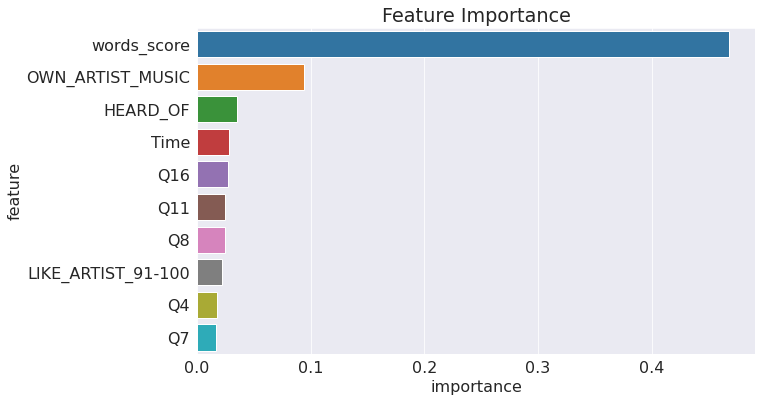

In [206]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=impt_df.head(10), x='importance', y='feature');

# Hyperparametre Tuning

In [210]:
def test_params(**params):
  model = XGBRegressor(n_jobs=-1, **params)
  model.fit(X_training, training_targets)
  training_rmse = rmse(model.predict(X_training), training_targets)
  validation_rmse = rmse(model.predict(X_validation), validation_targets)
  print('Training RMSE: {}, Validation RMSE: {}'.format(training_rmse, validation_rmse))

In [213]:
test_params(n_estimators=100)

[05:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 15.95594644858887, Validation RMSE: 16.012146067743867


In [212]:
test_params(n_estimators=200)

[05:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 15.608608855342386, Validation RMSE: 15.739599633365968


In [214]:
test_params(n_estimators=400)

[05:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 15.4972850265345, Validation RMSE: 15.663096963239324


In [215]:
test_params(n_estimators=800)

[05:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 15.164389073947351, Validation RMSE: 15.462918969733828


# Tree depth & Learning rate

In [216]:
test_params(n_estimators=175, max_depth=8, learning_rate=0.3)

[05:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 10.761732362133515, Validation RMSE: 14.483297295263416


In [217]:
test_params(n_estimators=175, max_depth=8, learning_rate=0.2)

[05:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 11.735802155463258, Validation RMSE: 14.475093637694114


In [220]:
test_params(booster='gblinear', n_estimators=400)

[06:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 21.67496231755449, Validation RMSE: 21.733228417983653


In [221]:
test_params(n_estimators=500, max_depth=9, learning_rate=0.15)

[06:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 8.142226331280742, Validation RMSE: 14.07542497669014


In [222]:
test_params(n_estimators=1000, max_depth=10, learning_rate=0.10, subsample=0.9, colsample_bytree=0.7)

[06:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 5.822519262858865, Validation RMSE: 14.082742854087666


In [223]:
from sklearn.model_selection import KFold

In [224]:
def train_and_evaluate(X_train_k, Y_train_k, X_val_k, Y_val_k, **params):
  model = XGBRegressor(n_jobs=-1, **params)
  model.fit(X_train_k, Y_train_k)
  train_rmse = rmse(model.predict(X_train_k), Y_train_k)
  val_rmse = rmse(model.predict(X_val_k), Y_val_k)
  return model, train_rmse, val_rmse

In [225]:
kfold = KFold(n_splits=5)

In [231]:
models = []

for train_idxs, val_idxs in kfold.split(X_training):
  X_train_k, Y_train_k = X_training.iloc[train_idxs], training_targets.iloc[train_idxs]
  X_val_k, Y_val_k = X_training.iloc[val_idxs], training_targets.iloc[val_idxs]
  model, train_rmse, val_rmse = train_and_evaluate(X_train_k, Y_train_k, X_val_k, Y_val_k, n_estimators=500, max_depth=9, learning_rate=0.10, subsample=0.9, colsample_bytree=0.7)
  models.append(model)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

[06:56:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8.87857799015854, Validation RMSE: 14.232260924487084
[07:03:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8.921200180590178, Validation RMSE: 14.264136056361622
[07:09:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8.870303235221652, Validation RMSE: 14.350492495024087
[07:16:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8.86326892581729, Validation RMSE: 14.419535640174853
[07:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8.877630772144759, Validation RMSE: 14.329955985260652


In [232]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [233]:
preds_kfold = predict_avg(models, X_validation)
rmse(preds_kfold, validation_targets)

13.89967225314936

In [234]:
test_preds = predict_avg(models, X_test)

# Final Answer

In [235]:
test_preds.shape

(125794,)